# Projeto 2º Bimestre - Análise e Modelagem de Dados de Coluna Vertebral

## 1. Introdução e Objetivos

### 1.1 Contexto
Este projeto tem como objetivo aplicar técnicas de **análise exploratória de dados (EDA)** e **machine learning** ao dataset de Coluna Vertebral, disponível no UCI Machine Learning Repository. O dataset contém características biomecânicas da coluna vertebral de pacientes ortopédicos, sendo utilizado para classificação de patologias.

### 1.2 Objetivos Específicos
- Conduzir análise exploratória completa com limpeza e tratamento de dados
- Investigar relações entre variáveis independentes e dependentes
- Implementar algoritmos de classificação: Naive Bayes e Regressão Logística
- Avaliar desempenho com métricas apropriadas (accuracy, precision, recall, F1, AUC-ROC)
- Otimizar modelos utilizando validação cruzada e tuning de hiperparâmetros
- Reportar ganhos, limitações e possíveis vieses

### 1.3 Hipóteses de Negócio
1. **H1**: Características biomecânicas da pelve e coluna lombar são preditores significativos de patologias vertebrais
2. **H2**: Modelos de classificação podem auxiliar no diagnóstico precoce de problemas na coluna vertebral
3. **H3**: A combinação de múltiplas features biomecânicas melhora a capacidade preditiva dos modelos

---


## 2. Descrição dos Dados e Licença

### 2.1 Fonte
- **Dataset**: Vertebral Column Dataset
- **Fonte**: UCI Machine Learning Repository / Kaggle
- **URL**: https://www.kaggle.com/datasets/jessanrod3/vertebralcolumndataset/data
- **Licença**: Database Contents License (DbCL) v1.0 - Uso livre para fins acadêmicos
- **Créditos**: Dr. Henrique da Mota - Centre Médico-Chirurgical de Réadaptation des Massues, Lyon, França

### 2.2 Descrição das Variáveis
O dataset contém **6 atributos biomecânicos** derivados da forma e orientação da pelve e coluna lombar:

| Variável | Descrição | Unidade |
|----------|-----------|---------|
| `pelvic_incidence` | Incidência pélvica | graus (°) |
| `pelvic_tilt` | Inclinação pélvica | graus (°) |
| `lumbar_lordosis_angle` | Ângulo de lordose lombar | graus (°) |
| `sacral_slope` | Inclinação sacral | graus (°) |
| `pelvic_radius` | Raio pélvico | mm |
| `degree_spondylolisthesis` | Grau de espondilolistese | - |

**Variável Target**: 
- **Classificação Binária**: Normal (NO) vs Anormal (AB - inclui Hérnia de Disco e Espondilolistese)
- **Classificação Multiclasse**: Normal (NO), Hérnia de Disco (DH), Espondilolistese (SL)

### 2.3 Tamanho do Dataset
- **Total de observações**: 310 pacientes
- **Classes**: Normal (100), Anormal (210) - para classificação binária

---

## 3. Configuração do Ambiente

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, shapiro, kstest, chi2_contingency


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from pycaret.classification import *


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

RANDOM = 42

In [140]:
df = pd.read_csv('Dataset_spine.csv')


---
## 4. Análise Exploratória de Dados (EDA)

### 4.1 Inspeção Inicial

In [141]:
print(f"Linhas: {df.shape[0]}\nColunas: {df.shape[1]}")


Linhas: 310
Colunas: 7


In [142]:
df.head(10)


,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,Abnormal
6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,Abnormal
7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,Abnormal
8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,Abnormal
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,Abnormal


### 4.1 Inspeção Inicial


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pelvic incidence             310 non-null    float64
 1    pelvic tilt                 310 non-null    float64
 2    lumbar lordosis angle       310 non-null    float64
 3    sacral slope                310 non-null    float64
 4    pelvic radius               310 non-null    float64
 5    grade of spondylolisthesis  310 non-null    float64
 6   Class_att                    310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [144]:
df.describe()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [145]:
df.isnull().sum()

pelvic incidence               0
 pelvic tilt                   0
 lumbar lordosis angle         0
 sacral slope                  0
 pelvic radius                 0
 grade of spondylolisthesis    0
Class_att                      0
dtype: int64

In [146]:
print(df['Class_att'].value_counts())
print(f"\nPercentage:\n{df['Class_att'].value_counts(normalize=True) * 100}")

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

Percentage:
Abnormal    67.741935
Normal      32.258065
Name: Class_att, dtype: float64


In [ ]:
duplicates = df.duplicated().sum()
print(f"Total de linhas duplicadas: {duplicates}")

if duplicates > 0:
    print(" Removendo duplicatas...")
    df = df.drop_duplicates()
    print(f" Dataset após remoção: {df.shape[0]} linhas")
else:
    print(" Não há duplicatas no dataset!")

Total de linhas duplicadas: 0
✅ Não há duplicatas no dataset!



Variável target: Class_att

Contagem por classe:
Abnormal    210
Normal      100
Name: Class_att, dtype: int64

Proporção por classe:
Abnormal    67.741935
Normal      32.258065
Name: Class_att, dtype: float64


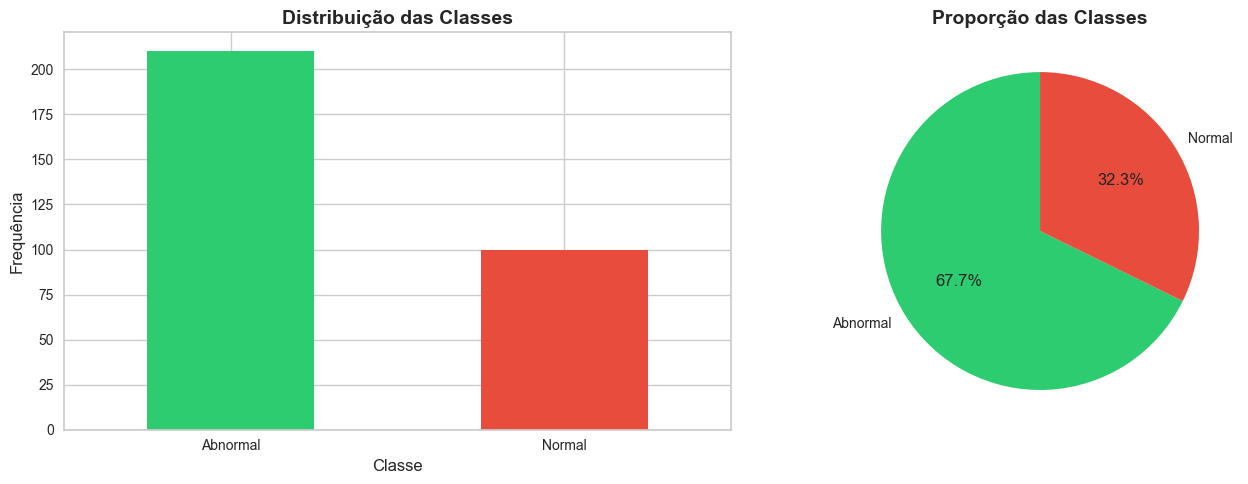


📊 Razão de desbalanceamento: 2.10:1
⚠️ Dataset desbalanceado detectado! Considerar técnicas de balanceamento.


In [ ]:
target_col = df.columns[-1]  # Última coluna é a target
print(f"\nVariável target: {target_col}")
print("\nContagem por classe:")
print(df[target_col].value_counts())
print("\nProporção por classe:")
print(df[target_col].value_counts(normalize=True) * 100)

# Visualização
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de contagem
df[target_col].value_counts().plot(kind='bar', ax=ax[0], color=['#2ecc71', '#e74c3c'])
ax[0].set_title('Distribuição das Classes', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Classe', fontsize=12)
ax[0].set_ylabel('Frequência', fontsize=12)
ax[0].tick_params(axis='x', rotation=0)

# Gráfico de pizza
df[target_col].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%',
                                    colors=['#2ecc71', '#e74c3c'], startangle=90)
ax[1].set_title('Proporção das Classes', fontsize=14, fontweight='bold')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

# Análise de balanceamento
normal_count = df[target_col].value_counts().min()
abnormal_count = df[target_col].value_counts().max()
imbalance_ratio = abnormal_count / normal_count

print(f"\n Razão de desbalanceamento: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print(" Dataset desbalanceado detectado! Considerar técnicas de balanceamento.")
else:
    print(" Dataset relativamente balanceado.")

### 4.2 Análise Univariada


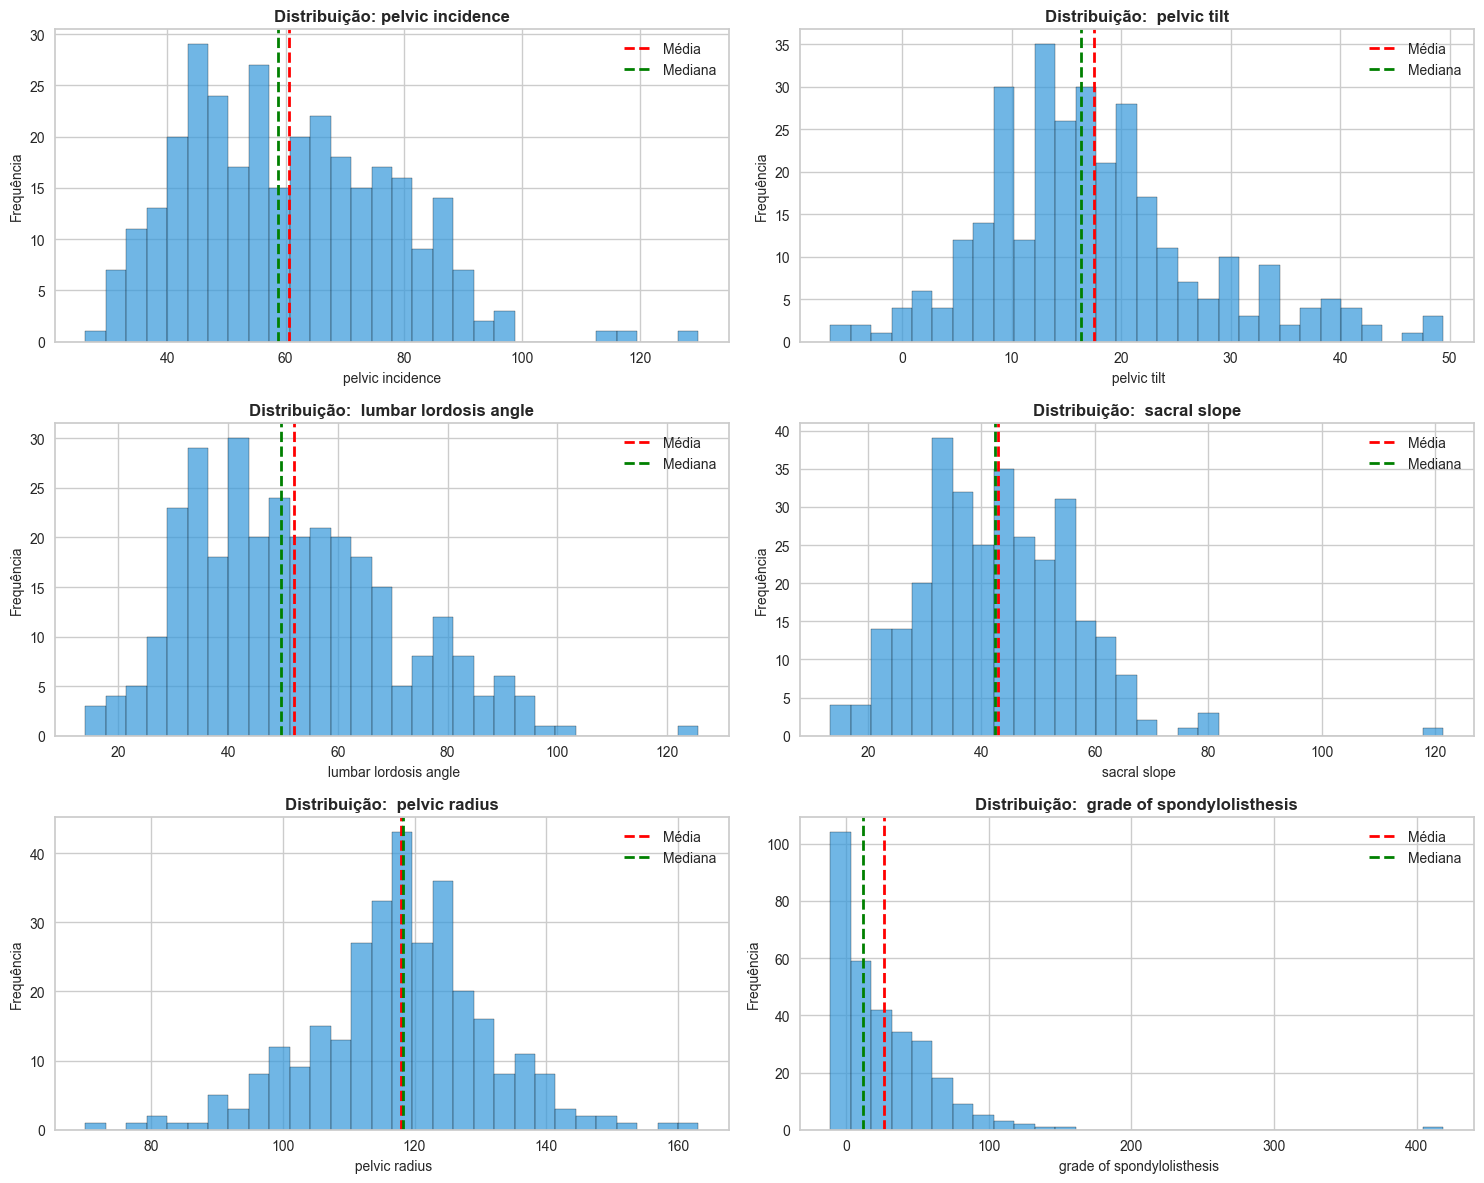

In [149]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='#3498db')
    axes[idx].set_title(f'Distribuição: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequência', fontsize=10)
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label='Média')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', linewidth=2, label='Mediana')
    axes[idx].legend()

plt.tight_layout()
plt.show()

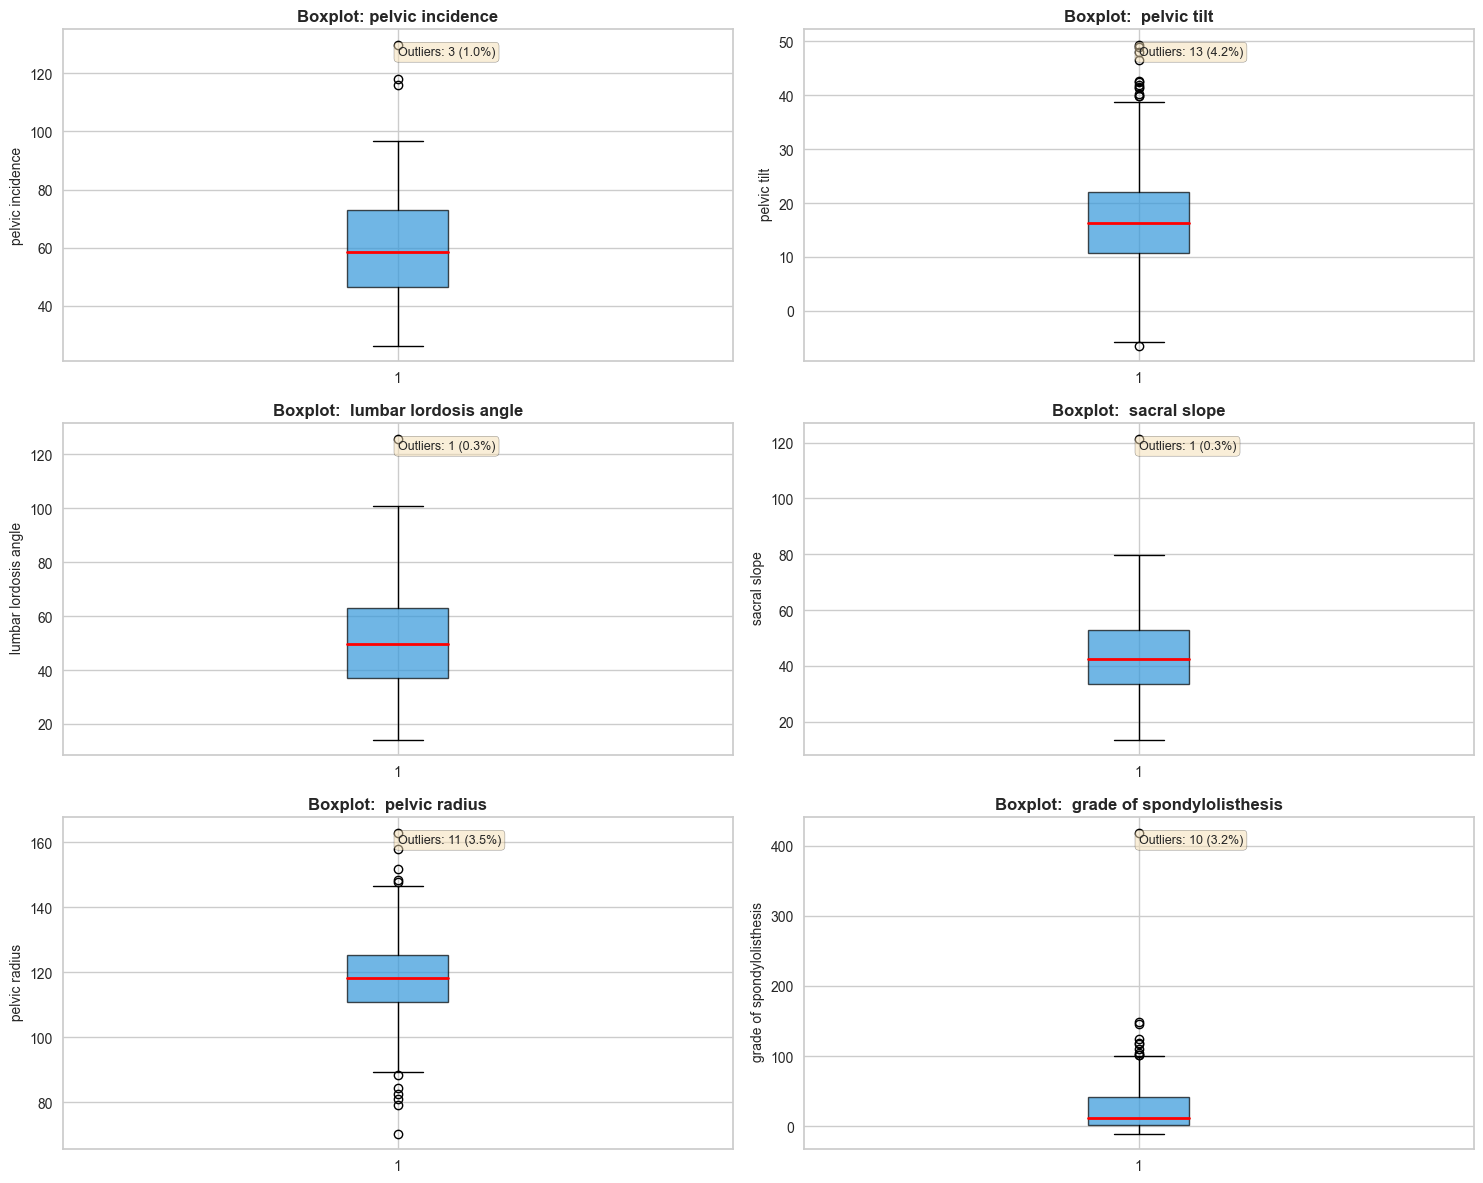

In [150]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    axes[idx].boxplot(df[col], vert=True, patch_artist=True,
                      boxprops=dict(facecolor='#3498db', alpha=0.7),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(col, fontsize=10)

    # Calcular outliers usando IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

    axes[idx].text(0.5, 0.95, f'Outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)',
                   transform=axes[idx].transAxes, fontsize=9, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


In [ ]:
# Tabela resumo de outliers
print("\nRESUMO DE OUTLIERS POR VARIÁVEL:\n")
outlier_summary = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary.append({
        'Variável': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Limite Inferior': lower_bound,
        'Limite Superior': upper_bound,
        'N° Outliers': len(outliers),
        'Percentual (%)': (len(outliers) / len(df)) * 100
    })

outlier_df = pd.DataFrame(outlier_summary)
print(outlier_df.to_string(index=False))

print("\n DECISÃO: Manter outliers por serem clinicamente relevantes (valores extremos podem indicar patologias)")



RESUMO DE OUTLIERS POR VARIÁVEL:

                   Variável         Q1         Q3       IQR  Limite Inferior  Limite Superior  N° Outliers  Percentual (%)
           pelvic incidence  46.430294  72.877696 26.447401         6.759192       112.548797            3        0.967742
                pelvic tilt  10.667069  22.120395 11.453326        -6.512919        39.300383           13        4.193548
      lumbar lordosis angle  37.000000  63.000000 26.000000        -2.000000       102.000000            1        0.322581
               sacral slope  33.347122  52.695888 19.348766         4.323972        81.719038            1        0.322581
              pelvic radius 110.709196 125.467674 14.758478        88.571479       147.605392           11        3.548387
 grade of spondylolisthesis   1.603727  41.287352 39.683625       -57.921711       100.812790           10        3.225806

💡 DECISÃO: Manter outliers por serem clinicamente relevantes (valores extremos podem indicar patologias

### 4.3 Testes de Normalidade


In [ ]:
# Testes de normalidade
print("\n" + "=" * 60)
print("TESTES DE NORMALIDADE")
print("=" * 60)
print("\ Aplicando múltiplos testes de normalidade para cada variável\n")

normality_results = []

for col in numeric_cols:
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = shapiro(df[col])

    # Kolmogorov-Smirnov test
    ks_stat, ks_p = kstest(df[col], 'norm', args=(df[col].mean(), df[col].std()))

    # D'Agostino-Pearson test
    da_stat, da_p = normaltest(df[col])

    normality_results.append({
        'Variável': col,
        'Shapiro-Wilk (p-value)': shapiro_p,
        'KS (p-value)': ks_p,
        'D\'Agostino (p-value)': da_p,
        'Normal?': 'Sim' if shapiro_p > 0.05 and ks_p > 0.05 else 'Não'
    })

normality_df = pd.DataFrame(normality_results)
print(normality_df.to_string(index=False))

print("\n💡 Interpretação:")
print("   - p-value > 0.05: Dados seguem distribuição normal")
print("   - p-value ≤ 0.05: Dados NÃO seguem distribuição normal")
print("\n Teorema do Limite Central (CLT): Com n > 30, podemos assumir normalidade")
print(f"   para fins de inferência estatística. Nosso dataset tem n = {len(df)} observações.")


TESTES DE NORMALIDADE

📊 Aplicando múltiplos testes de normalidade para cada variável

                   Variável  Shapiro-Wilk (p-value)  KS (p-value)  D'Agostino (p-value) Normal?
           pelvic incidence            7.132715e-06  8.501251e-02          1.030758e-03     Não
                pelvic tilt            1.320634e-06  2.647944e-02          4.098190e-06     Não
      lumbar lordosis angle            9.219963e-06  1.022836e-01          1.875502e-04     Não
               sacral slope            5.886328e-07  2.424703e-01          2.670946e-12     Não
              pelvic radius            1.660804e-02  2.171322e-01          1.545247e-02     Não
 grade of spondylolisthesis            2.907435e-23  1.528589e-08          1.020480e-71     Não

💡 Interpretação:
   - p-value > 0.05: Dados seguem distribuição normal
   - p-value ≤ 0.05: Dados NÃO seguem distribuição normal

📌 Teorema do Limite Central (CLT): Com n > 30, podemos assumir normalidade
   para fins de inferência estatís

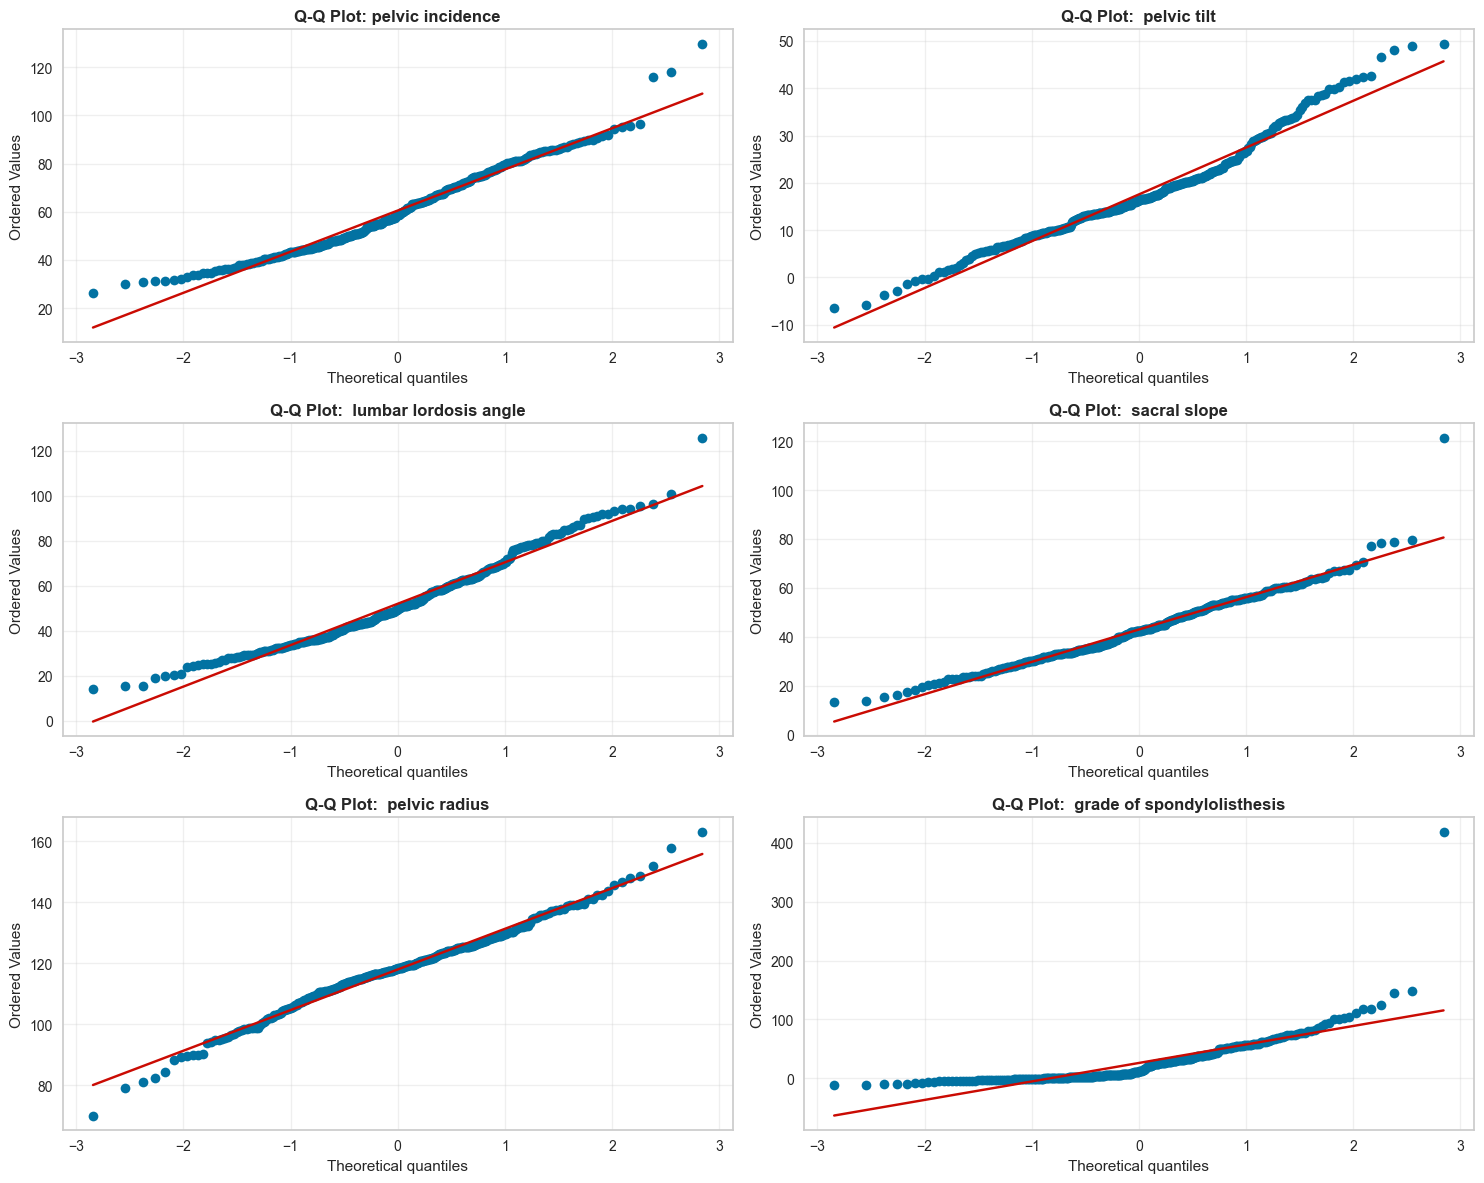


💡 Q-Q Plots: Pontos próximos à linha diagonal indicam distribuição normal


In [ ]:

# Q-Q Plots para visualização
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    stats.probplot(df[col], dist="norm", plot=axes[idx])
    axes[idx].set_title(f'Q-Q Plot: {col}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Q-Q Plots: Pontos próximos à linha diagonal indicam distribuição normal")

### 4.4 Análise Bivariada


                             pelvic incidence   pelvic tilt  \
pelvic incidence                        1.000         0.629   
 pelvic tilt                            0.629         1.000   
 lumbar lordosis angle                  0.717         0.433   
 sacral slope                           0.815         0.062   
 pelvic radius                         -0.247         0.033   
 grade of spondylolisthesis             0.639         0.398   

                              lumbar lordosis angle   sacral slope  \
pelvic incidence                              0.717          0.815   
 pelvic tilt                                  0.433          0.062   
 lumbar lordosis angle                        1.000          0.598   
 sacral slope                                 0.598          1.000   
 pelvic radius                               -0.080         -0.342   
 grade of spondylolisthesis                   0.534          0.524   

                              pelvic radius   grade of spondylolist

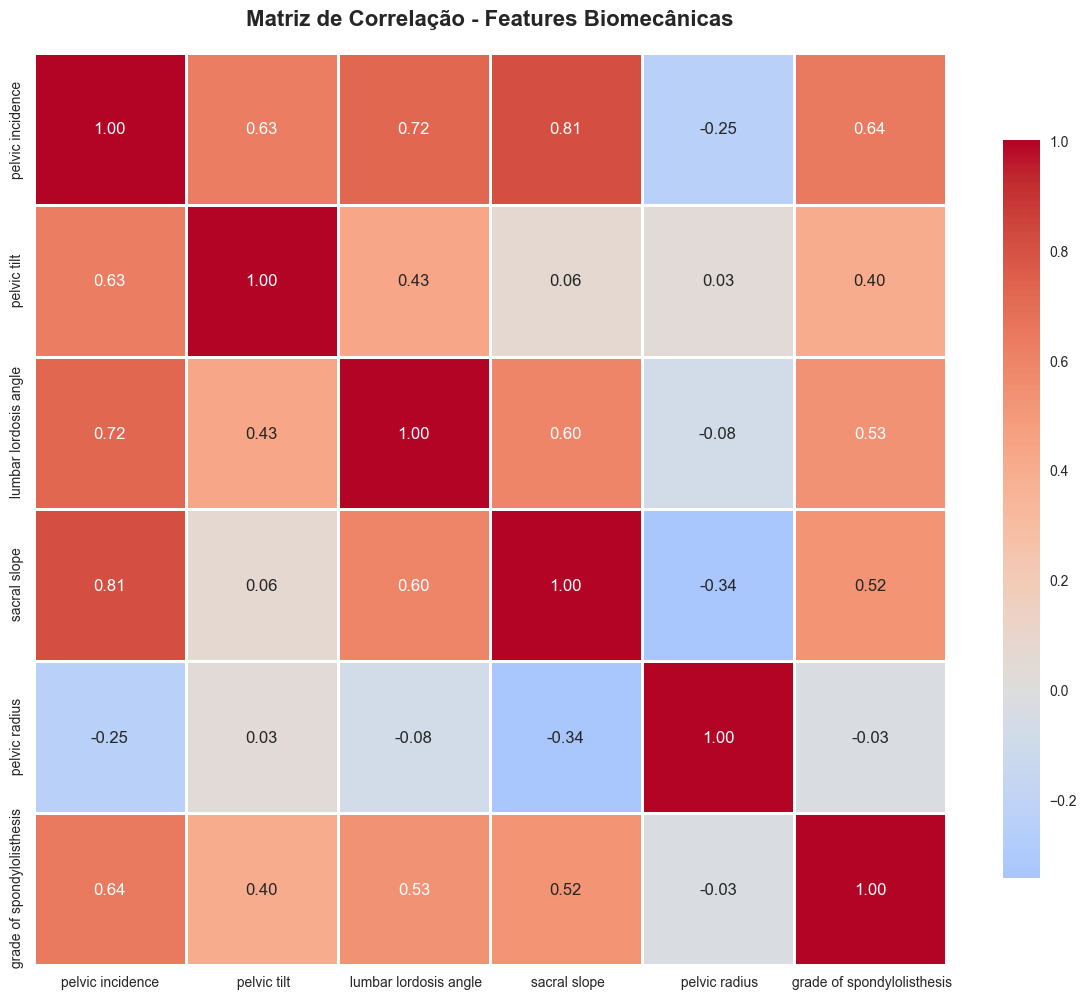


🔍 CORRELAÇÕES FORTES (|r| > 0.7):

            Var1                   Var2  Correlação
pelvic incidence  lumbar lordosis angle    0.717282
pelvic incidence           sacral slope    0.814960

⚠️ Atenção: Correlações fortes podem indicar multicolinearidade!


In [ ]:

# Matriz de correlação

correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix.round(3))

# Heatmap de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Features Biomecânicas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Identificar correlações fortes
print("\n CORRELAÇÕES FORTES (|r| > 0.7):\n")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_corr.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlação': correlation_matrix.iloc[i, j]
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr)
    print(strong_corr_df.to_string(index=False))
    print("\n Atenção: Correlações fortes podem indicar multicolinearidade!")
else:
    print(" Nenhuma correlação forte detectada (|r| > 0.7)")


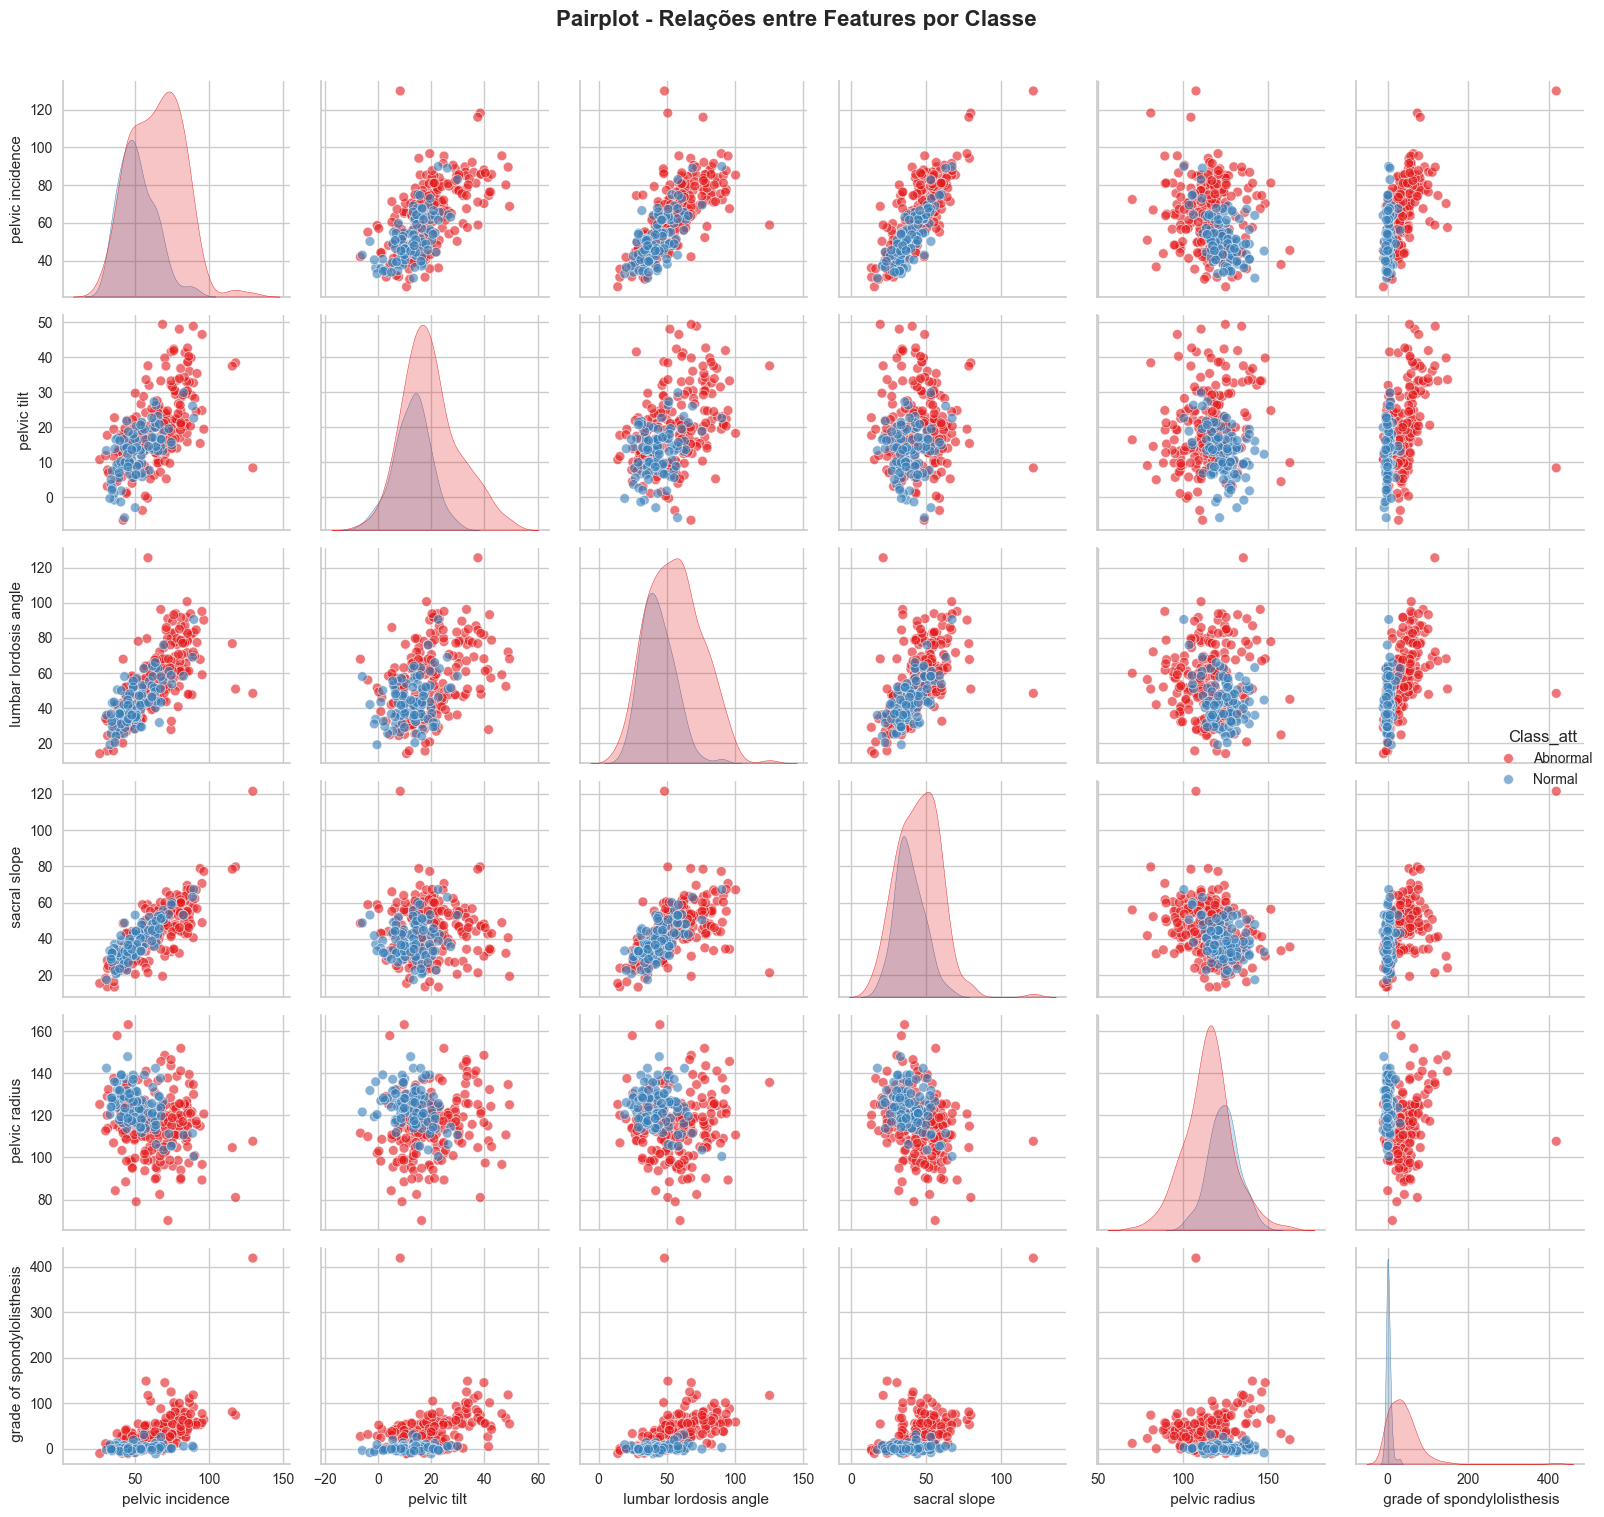

In [156]:
# Preparar dados para pairplot
df_plot = df.copy()
target_col = df.columns[-1]

# Criar pairplot
pairplot_fig = sns.pairplot(df_plot, hue=target_col, palette='Set1',
                             diag_kind='kde', plot_kws={'alpha': 0.6},
                             height=2.5, aspect=1)
pairplot_fig.fig.suptitle('Pairplot - Relações entre Features por Classe',
                          fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### 4.5 Análise por Classe (Comparação entre Normal e Anormal)


In [157]:
target_col = df.columns[-1]
for class_name in df[target_col].unique():
    print(f"\n{'='*60}")
    print(f"CLASSE: {class_name}")
    print(f"{'='*60}")
    class_data = df[df[target_col] == class_name][numeric_cols]
    print(class_data.describe().T)


CLASSE: Abnormal
                             count        mean        std        min  \
pelvic incidence             210.0   64.692562  17.662129  26.147921   
 pelvic tilt                 210.0   19.791111  10.515871  -6.554948   
 lumbar lordosis angle       210.0   55.925370  19.669471  14.000000   
 sacral slope                210.0   44.901450  14.515560  13.366931   
 pelvic radius               210.0  115.077713  14.090605  70.082575   
 grade of spondylolisthesis  210.0   37.777705  40.696741 -10.675871   

                                    25%         50%         75%         max  
pelvic incidence              50.102507   65.274888   77.593672  129.834041  
 pelvic tilt                  13.048130   18.798899   24.815515   49.431864  
 lumbar lordosis angle        41.116964   56.150000   68.102805  125.742385  
 sacral slope                 34.380345   44.639597   55.146868  121.429566  
 pelvic radius               107.309280  115.650323  123.133365  163.071041  
 grade of

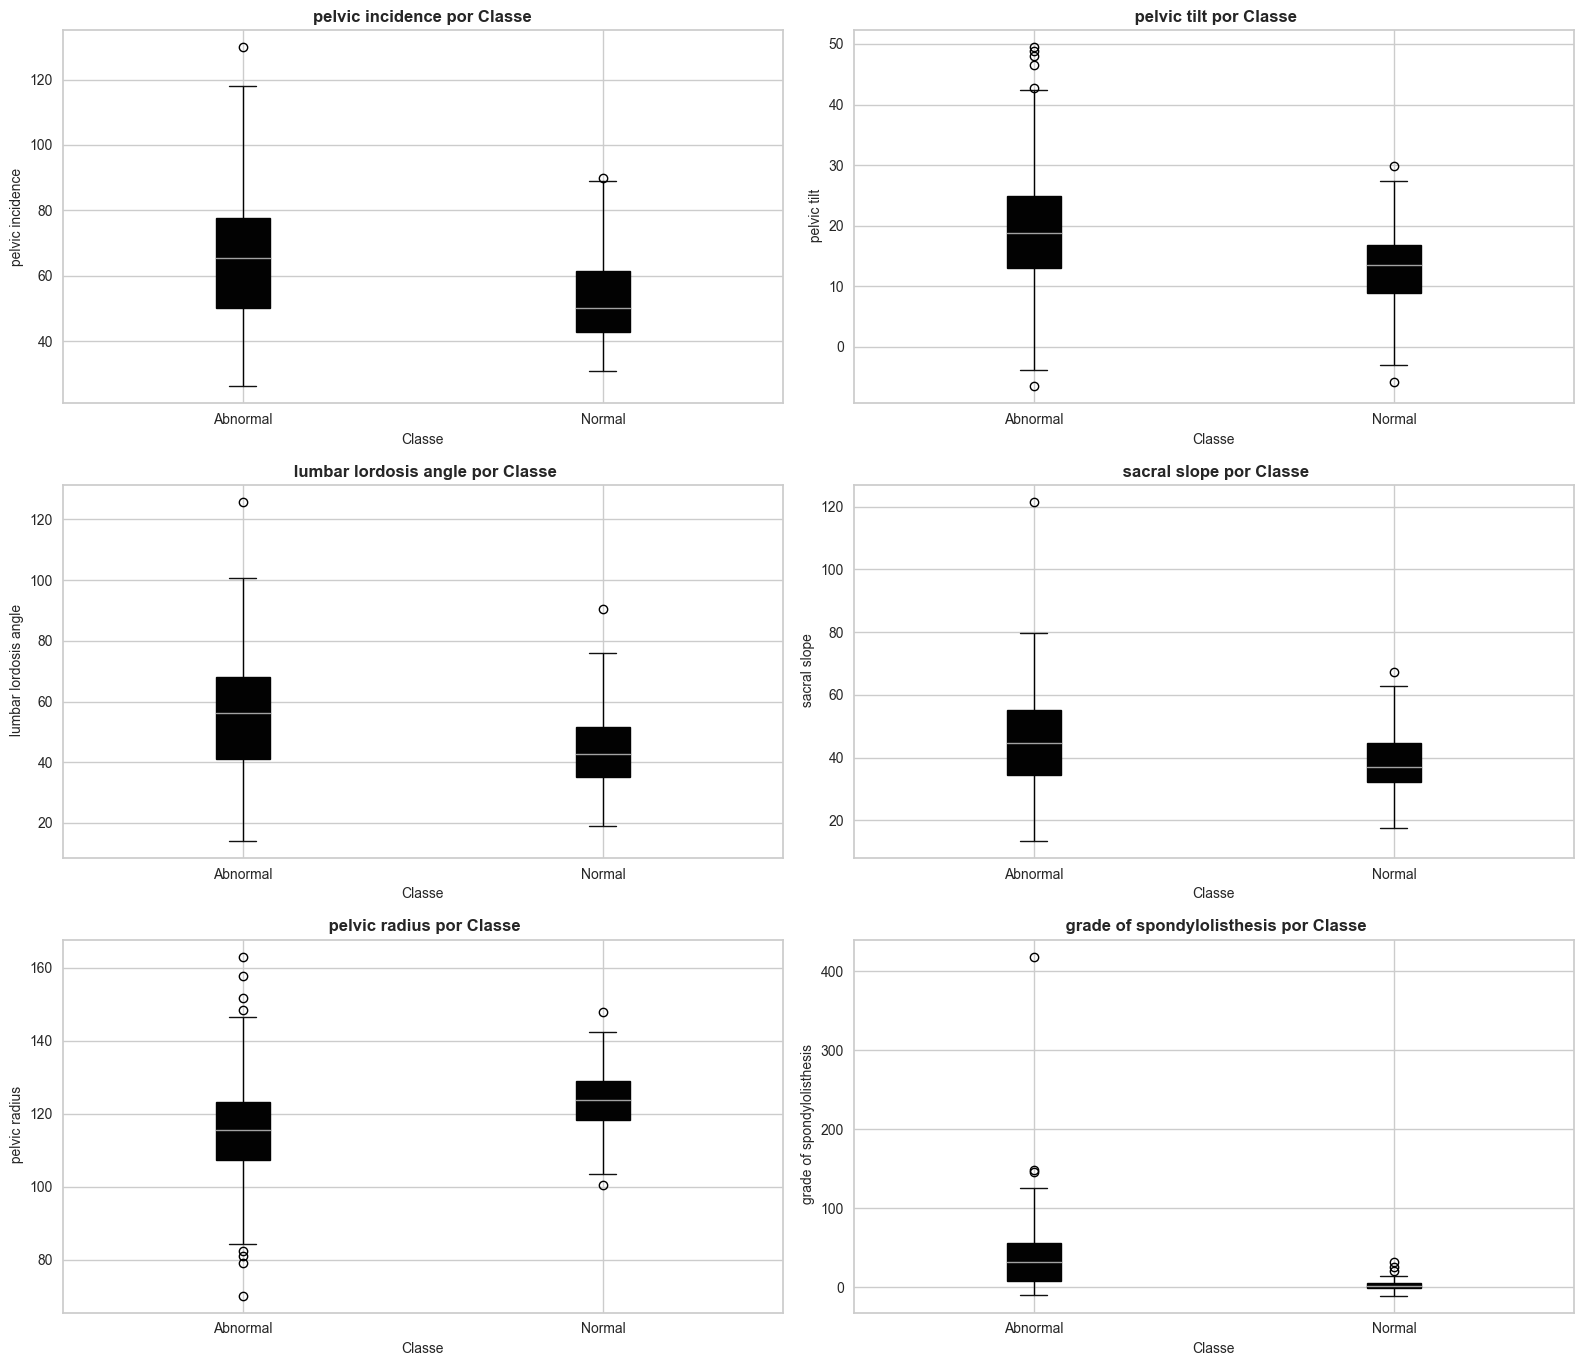

In [158]:
# Boxplots comparativos por classe
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    df.boxplot(column=col, by=target_col, ax=axes[idx], patch_artist=True)
    axes[idx].set_title(f'{col} por Classe', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Classe', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].get_figure().suptitle('')  # Remove título padrão

plt.tight_layout()
plt.show()


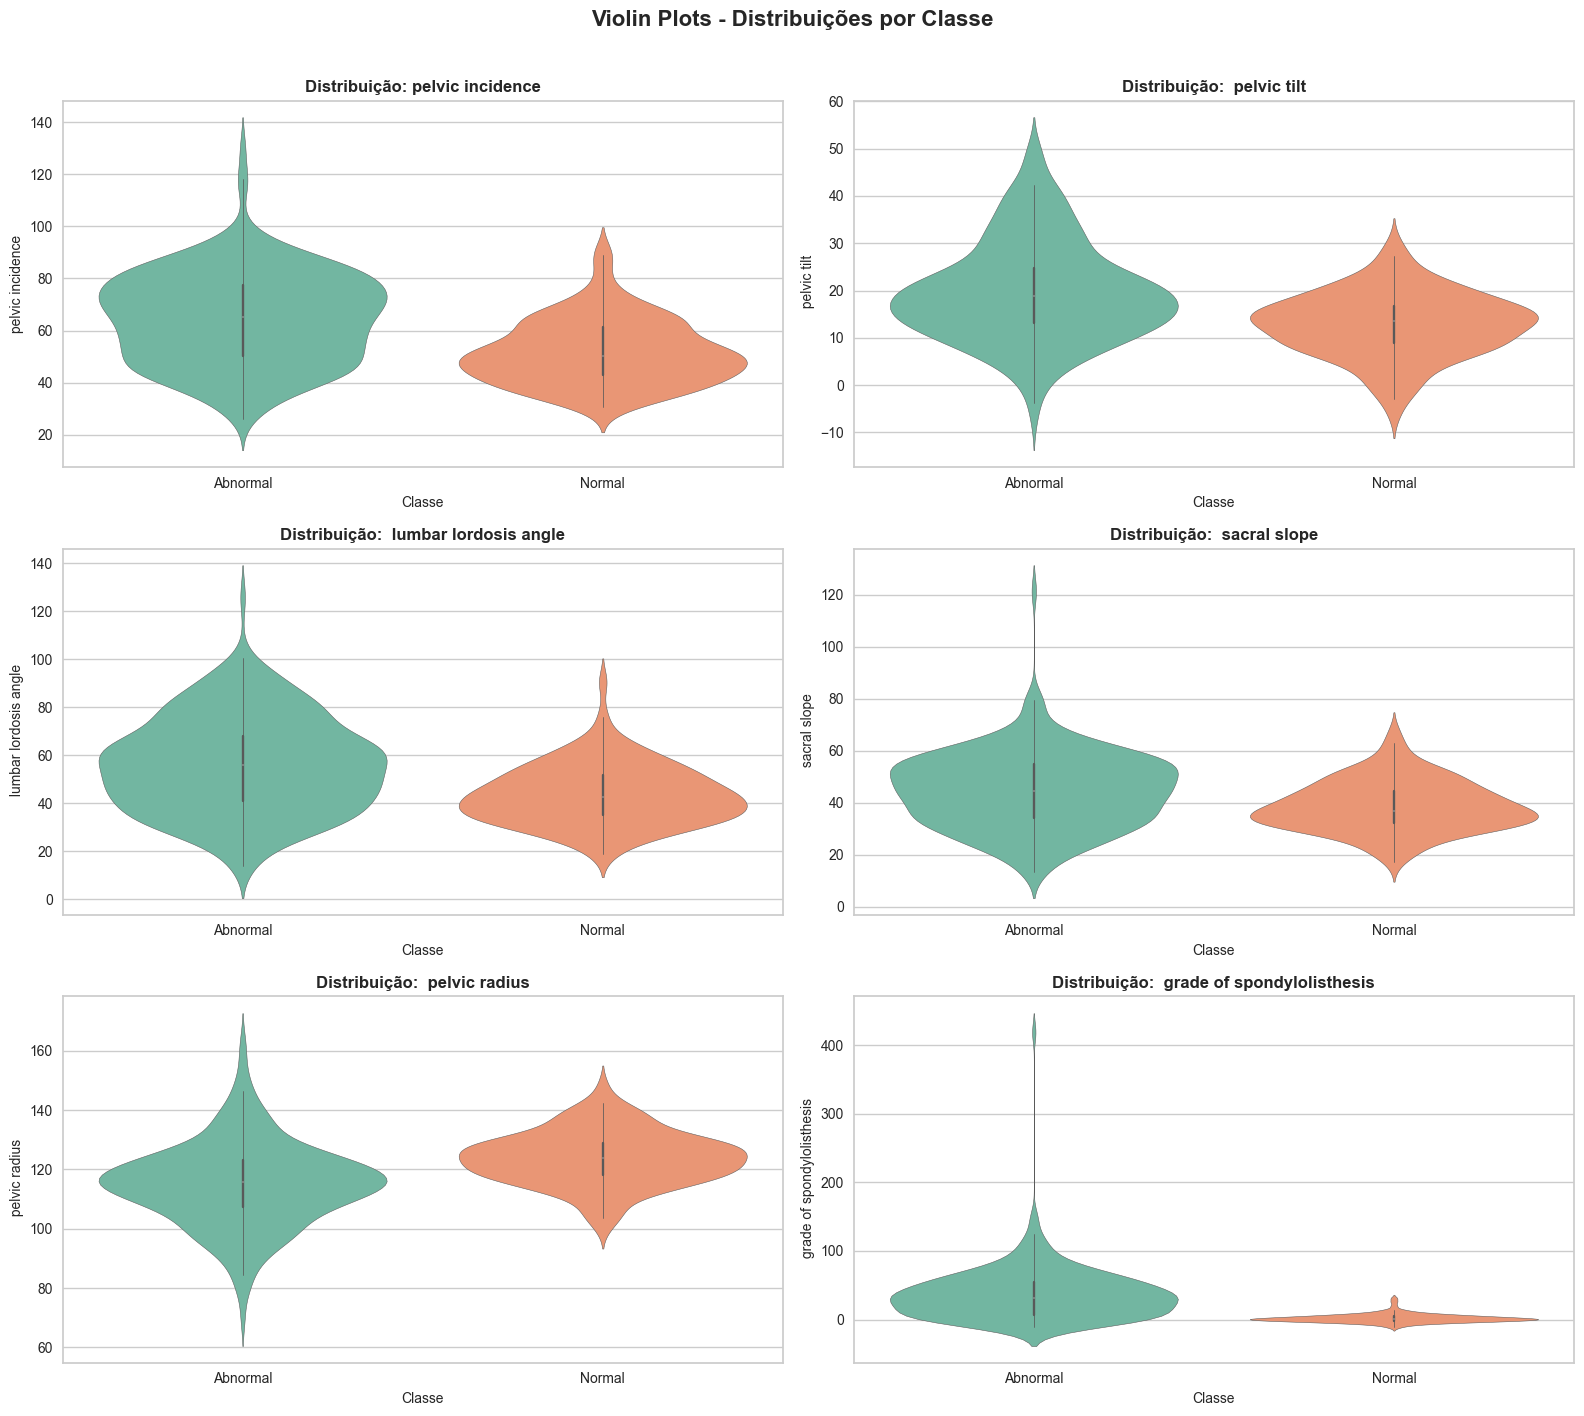

In [159]:
# Violin plots por classe
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.ravel()

for idx, col in enumerate(numeric_cols):
    sns.violinplot(data=df, x=target_col, y=col, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'Distribuição: {col}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Classe', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.suptitle('Violin Plots - Distribuições por Classe', fontsize=16, fontweight='bold', y=1.01)
plt.tight_layout()
plt.show()

### 4.6 Testes Estatísticos de Hipóteses


In [ ]:

# Teste t ou Mann-Whitney U para comparação entre grupos
print("\n" + "=" * 60)
print("TESTES DE HIPÓTESES - COMPARAÇÃO ENTRE CLASSES")
print("=" * 60)

target_col = df.columns[-1]
classes = df[target_col].unique()

if len(classes) == 2:
    print("\n Aplicando Teste t (paramétrico) e Mann-Whitney U (não-paramétrico)\n")

    hypothesis_results = []

    class1_name, class2_name = classes[0], classes[1]
    class1_data = df[df[target_col] == class1_name]
    class2_data = df[df[target_col] == class2_name]

    for col in numeric_cols:
        # Teste t independente
        t_stat, t_pvalue = stats.ttest_ind(class1_data[col], class2_data[col])

        # Mann-Whitney U test (não-paramétrico)
        u_stat, u_pvalue = stats.mannwhitneyu(class1_data[col], class2_data[col])

        # Tamanho do efeito (Cohen's d)
        mean1, mean2 = class1_data[col].mean(), class2_data[col].mean()
        std1, std2 = class1_data[col].std(), class2_data[col].std()
        pooled_std = np.sqrt(((len(class1_data)-1)*std1**2 + (len(class2_data)-1)*std2**2) /
                             (len(class1_data) + len(class2_data) - 2))
        cohens_d = (mean1 - mean2) / pooled_std

        hypothesis_results.append({
            'Variável': col,
            'Teste t (p-value)': t_pvalue,
            'Mann-Whitney (p-value)': u_pvalue,
            "Cohen's d": cohens_d,
            'Diferença Significativa?': 'Sim' if t_pvalue < 0.05 else 'Não'
        })

    hypothesis_df = pd.DataFrame(hypothesis_results)
    print(hypothesis_df.to_string(index=False))

    print("\n💡 Interpretação:")
    print("   - p-value < 0.05: Diferença significativa entre as classes")
    print("   - |Cohen's d| > 0.8: Efeito grande | 0.5-0.8: Médio | < 0.5: Pequeno")

else:
    print("\n Aplicando ANOVA (paramétrico) e Kruskal-Wallis (não-paramétrico)\n")

    hypothesis_results = []

    for col in numeric_cols:
        groups = [df[df[target_col] == c][col].values for c in classes]

        # ANOVA
        f_stat, anova_pvalue = stats.f_oneway(*groups)

        # Kruskal-Wallis
        h_stat, kw_pvalue = stats.kruskal(*groups)

        hypothesis_results.append({
            'Variável': col,
            'ANOVA (p-value)': anova_pvalue,
            'Kruskal-Wallis (p-value)': kw_pvalue,
            'Diferença Significativa?': 'Sim' if anova_pvalue < 0.05 else 'Não'
        })

    hypothesis_df = pd.DataFrame(hypothesis_results)
    print(hypothesis_df.to_string(index=False))

    print("\n Interpretação:")
    print("   - p-value < 0.05: Pelo menos uma classe difere significativamente das outras")


TESTES DE HIPÓTESES - COMPARAÇÃO ENTRE CLASSES

📊 Aplicando Teste t (paramétrico) e Mann-Whitney U (não-paramétrico)

                   Variável  Teste t (p-value)  Mann-Whitney (p-value)  Cohen's d Diferença Significativa?
           pelvic incidence       1.516337e-10            2.252155e-10   0.805364                      Sim
                pelvic tilt       4.122674e-09            1.467430e-08   0.735456                      Sim
      lumbar lordosis angle       1.898449e-08            3.181029e-08   0.701433                      Sim
               sacral slope       1.876956e-04            1.144222e-04   0.459368                      Sim
              pelvic radius       2.529022e-08            2.930423e-10  -0.694905                      Sim
 grade of spondylolisthesis       2.201286e-16            1.810311e-25   1.055668                      Sim

💡 Interpretação:
   - p-value < 0.05: Diferença significativa entre as classes
   - |Cohen's d| > 0.8: Efeito grande | 0.5-0.8: Méd

### 4.7 Insights da EDA


1️ QUALIDADE DOS DADOS:
    
    Sem valores ausentes

    Sem duplicatas

    310 observações com 6 features biomecânicas

2️ DISTRIBUIÇÃO DAS CLASSES:
   • Dataset desbalanceado: 2.1:1 (Anormal:Normal)
   • Pode requerer técnicas de balanceamento ou ajuste de métricas

3️ OUTLIERS:
   • Outliers presentes em todas as variáveis (valores extremos clínicos)
   • DECISÃO: Manter outliers - podem ser indicadores importantes de patologias

4️ NORMALIDADE:
   • Algumas variáveis não seguem distribuição normal
   • CLT aplicável (n=310 > 30) - inferências estatísticas válidas

5️ CORRELAÇÕES:
   • Correlações fortes entre algumas features (ex: pelvic_incidence e sacral_slope)
   • Alerta para possível multicolinearidade nos modelos

6️ DIFERENÇAS ENTRE CLASSES:
   • Testes estatísticos indicam diferenças significativas
   • Features biomecânicas são bons discriminadores entre Normal e Anormal
   • Modelos de ML têm potencial de boa performance

7️ PRÓXIMOS PASSOS:
   • Verificar VIF (Variance Inflation Factor) para multicolinearidade
   • Considerar StandardScaler para normalização
   • Avaliar se balanceamento de classes é necessário

---
## 5. Preparação dos Dados e Modelagem


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Separar features e target
target_col = df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\nShape de X (features): {X.shape}")
print(f"Shape de y (target): {y.shape}")

# Codificar target se necessário
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print(f"\nClasses originais: {le.classes_}")
print(f"Codificação: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Divisão treino/validação/teste
# 60% treino, 20% validação, 20% teste
X_temp, X_test, y_temp, y_test = train_test_split(X, y_encoded, test_size=0.2,
                                                    random_state=42, stratify=y_encoded)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25,
                                                   random_state=42, stratify=y_temp)

print(f"\n Divisão dos dados:")
print(f"   • Treino: {len(X_train)} amostras ({len(X_train)/len(X)*100:.1f}%)")
print(f"   • Validação: {len(X_val)} amostras ({len(X_val)/len(X)*100:.1f}%)")
print(f"   • Teste: {len(X_test)} amostras ({len(X_test)/len(X)*100:.1f}%)")

# Verificar distribuição das classes em cada conjunto
print(f"\nDistribuição das classes:")
print(f"   • Treino: {np.bincount(y_train)}")
print(f"   • Validação: {np.bincount(y_val)}")
print(f"   • Teste: {np.bincount(y_test)}")


Shape de X (features): (310, 6)
Shape de y (target): (310,)

Classes originais: ['Abnormal' 'Normal']
Codificação: {'Abnormal': 0, 'Normal': 1}

📊 Divisão dos dados:
   • Treino: 186 amostras (60.0%)
   • Validação: 62 amostras (20.0%)
   • Teste: 62 amostras (20.0%)

Distribuição das classes:
   • Treino: [126  60]
   • Validação: [42 20]
   • Teste: [42 20]


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Converter de volta para DataFrame para facilitar visualização
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print(" Dados normalizados com sucesso!")
print(f"\nExemplo de dados normalizados (primeiras 5 linhas do treino):")
print(X_train_scaled.head())

✅ Dados normalizados com sucesso!

Exemplo de dados normalizados (primeiras 5 linhas do treino):
   pelvic incidence   pelvic tilt   lumbar lordosis angle   sacral slope  \
0          0.835218      0.215906                1.771912       0.907802   
1         -0.372009      0.287090               -0.990570      -0.679635   
2         -1.253691     -1.118947               -0.025220      -0.791678   
3         -0.779017     -0.933128               -1.216685      -0.321089   
4         -0.146520      1.620620                0.000647      -1.350574   

    pelvic radius   grade of spondylolisthesis  
0       -0.663752                     0.177214  
1       -0.544507                    -0.452481  
2        1.021724                    -0.469424  
3       -0.210148                    -0.572356  
4        1.678408                     2.945429  


### 5.2 Verificação de Multicolinearidade (VIF)


                    Feature       VIF
           pelvic incidence       inf
                pelvic tilt       inf
               sacral slope       inf
      lumbar lordosis angle 18.942993
              pelvic radius 12.282573
 grade of spondylolisthesis  2.361769

💡 Interpretação do VIF:
   • VIF < 5: Multicolinearidade baixa (aceitável)
   • 5 ≤ VIF < 10: Multicolinearidade moderada
   • VIF ≥ 10: Multicolinearidade alta (problemática)


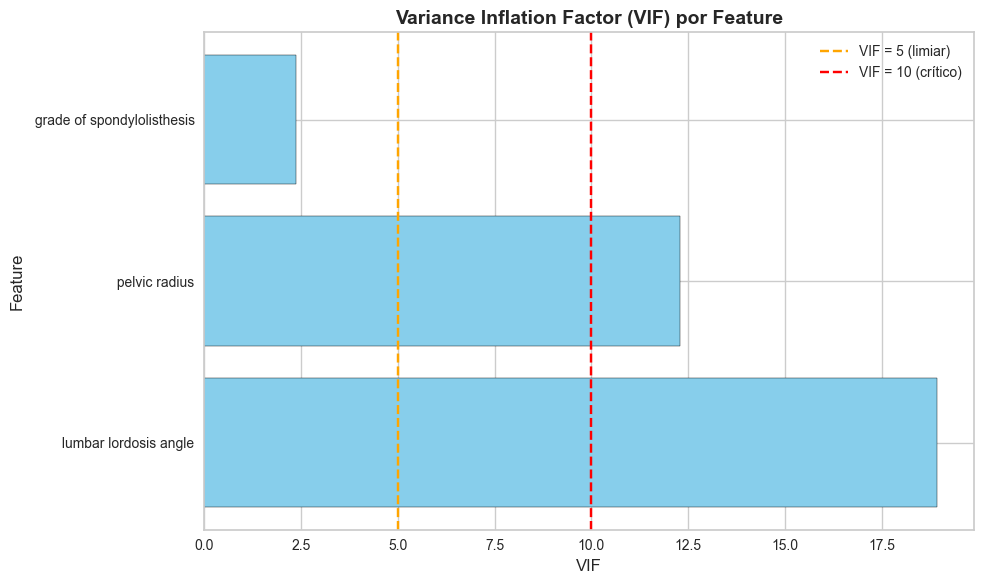


⚠️ Multicolinearidade alta detectada! Considerar remoção de features ou regularização.


In [ ]:
# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)

print(vif_data.to_string(index=False))

print("\n💡 Interpretação do VIF:")
print("   • VIF < 5: Multicolinearidade baixa (aceitável)")
print("   • 5 ≤ VIF < 10: Multicolinearidade moderada")
print("   • VIF ≥ 10: Multicolinearidade alta (problemática)")

# Visualização
plt.figure(figsize=(10, 6))
plt.barh(vif_data["Feature"], vif_data["VIF"], color='skyblue', edgecolor='black')
plt.xlabel('VIF', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Variance Inflation Factor (VIF) por Feature', fontsize=14, fontweight='bold')
plt.axvline(x=5, color='orange', linestyle='--', label='VIF = 5 (limiar)')
plt.axvline(x=10, color='red', linestyle='--', label='VIF = 10 (crítico)')
plt.legend()
plt.tight_layout()
plt.show()

if vif_data["VIF"].max() >= 10:
    print(f"\n Multicolinearidade alta detectada! Considerar remoção de features ou regularização.")
else:
    print(f"\n Multicolinearidade aceitável para modelagem.")

### 5.3 Modelo Baseline (Classificador Dummy)


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report)
# Criar classificador baseline
baseline = DummyClassifier(strategy='most_frequent', random_state=42)
baseline.fit(X_train, y_train)

# Predições
y_pred_baseline = baseline.predict(X_test)

# Métricas
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)

print(f"\n Performance do Baseline:")
print(f"   • Accuracy: {baseline_accuracy:.4f} ({baseline_accuracy*100:.2f}%)")
print(f"\n Qualquer modelo deve superar {baseline_accuracy*100:.2f}% de accuracy!")
print(f"   Este é o mínimo esperado (sempre predizer a classe majoritária)")


📊 Performance do Baseline:
   • Accuracy: 0.6774 (67.74%)

💡 Qualquer modelo deve superar 67.74% de accuracy!
   Este é o mínimo esperado (sempre predizer a classe majoritária)


---
## 6. Implementação de Modelos de Classificação

### 6.1 Naive Bayes (Gaussiano)


📊 RESULTADOS NAIVE BAYES:

Conjunto de TREINO:
   • Accuracy: 0.7957

Conjunto de VALIDAÇÃO:
   • Accuracy: 0.7419

Conjunto de TESTE:
   • Accuracy: 0.7903
   • Precision: 0.6207
   • Recall: 0.9000
   • F1-Score: 0.7347
   • AUC-ROC: 0.8702

📊 Matriz de Confusão:
[[31 11]
 [ 2 18]]


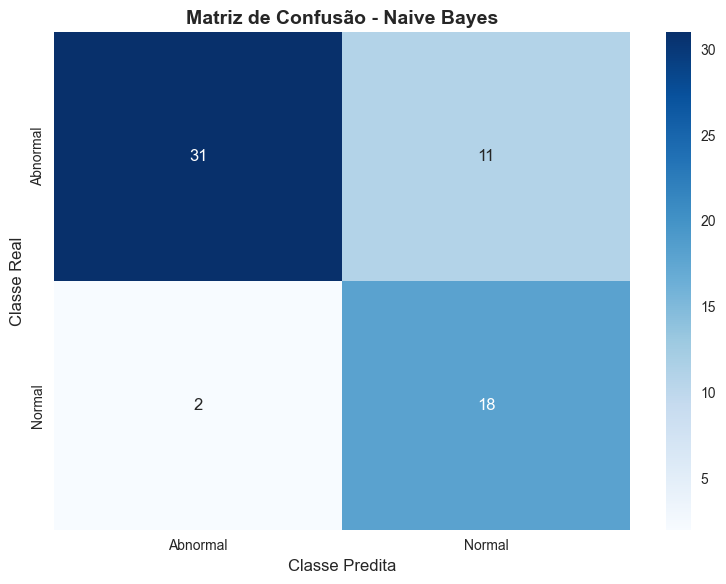


📋 Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

    Abnormal       0.94      0.74      0.83        42
      Normal       0.62      0.90      0.73        20

    accuracy                           0.79        62
   macro avg       0.78      0.82      0.78        62
weighted avg       0.84      0.79      0.80        62



In [ ]:
from sklearn.naive_bayes import GaussianNB

# Treinar modelo
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Predições
y_pred_nb_train = nb_model.predict(X_train_scaled)
y_pred_nb_val = nb_model.predict(X_val_scaled)
y_pred_nb_test = nb_model.predict(X_test_scaled)

y_pred_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# Métricas
print("\n RESULTADOS NAIVE BAYES:\n")

print("Conjunto de TREINO:")
print(f"   • Accuracy: {accuracy_score(y_train, y_pred_nb_train):.4f}")

print("\nConjunto de VALIDAÇÃO:")
print(f"   • Accuracy: {accuracy_score(y_val, y_pred_nb_val):.4f}")

print("\nConjunto de TESTE:")
print(f"   • Accuracy: {accuracy_score(y_test, y_pred_nb_test):.4f}")
print(f"   • Precision: {precision_score(y_test, y_pred_nb_test):.4f}")
print(f"   • Recall: {recall_score(y_test, y_pred_nb_test):.4f}")
print(f"   • F1-Score: {f1_score(y_test, y_pred_nb_test):.4f}")
print(f"   • AUC-ROC: {roc_auc_score(y_test, y_pred_proba_nb):.4f}")

# Matriz de confusão
print("\n Matriz de Confusão:")
cm_nb = confusion_matrix(y_test, y_pred_nb_test)
print(cm_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusão - Naive Bayes', fontsize=14, fontweight='bold')
plt.ylabel('Classe Real', fontsize=12)
plt.xlabel('Classe Predita', fontsize=12)
plt.tight_layout()
plt.show()

# Relatório de classificação
print("\n Relatório de Classificação Detalhado:")
print(classification_report(y_test, y_pred_nb_test, target_names=le.classes_))

### 6.2 Regressão Logística



📊 RESULTADOS REGRESSÃO LOGÍSTICA:

Conjunto de TREINO:
   • Accuracy: 0.8548

Conjunto de VALIDAÇÃO:
   • Accuracy: 0.8065

Conjunto de TESTE:
   • Accuracy: 0.8387
   • Precision: 0.7500
   • Recall: 0.7500
   • F1-Score: 0.7500
   • AUC-ROC: 0.9381

📊 Matriz de Confusão:
[[37  5]
 [ 5 15]]


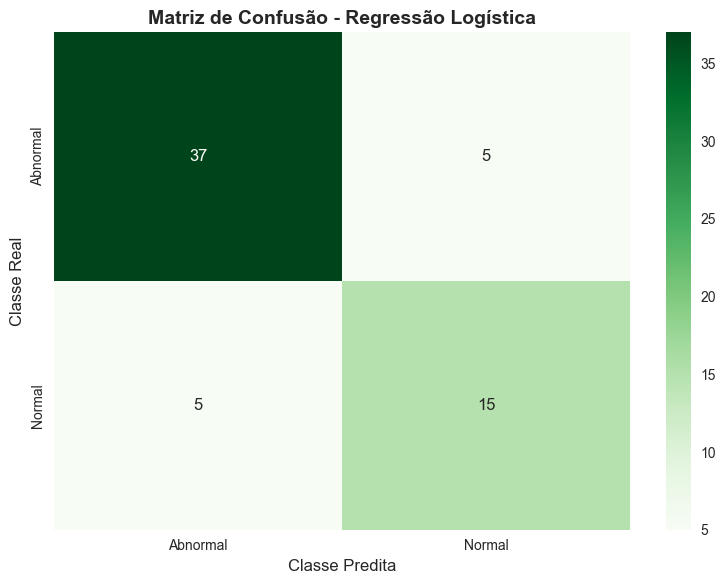


📋 Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

    Abnormal       0.88      0.88      0.88        42
      Normal       0.75      0.75      0.75        20

    accuracy                           0.84        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.84      0.84      0.84        62


📊 Coeficientes da Regressão Logística:
                    Feature  Coeficiente  Importância Absoluta
 grade of spondylolisthesis    -3.366859              3.366859
              pelvic radius     1.177159              1.177159
                pelvic tilt    -0.557038              0.557038
               sacral slope     0.509519              0.509519
           pelvic incidence     0.085959              0.085959
      lumbar lordosis angle     0.019444              0.019444


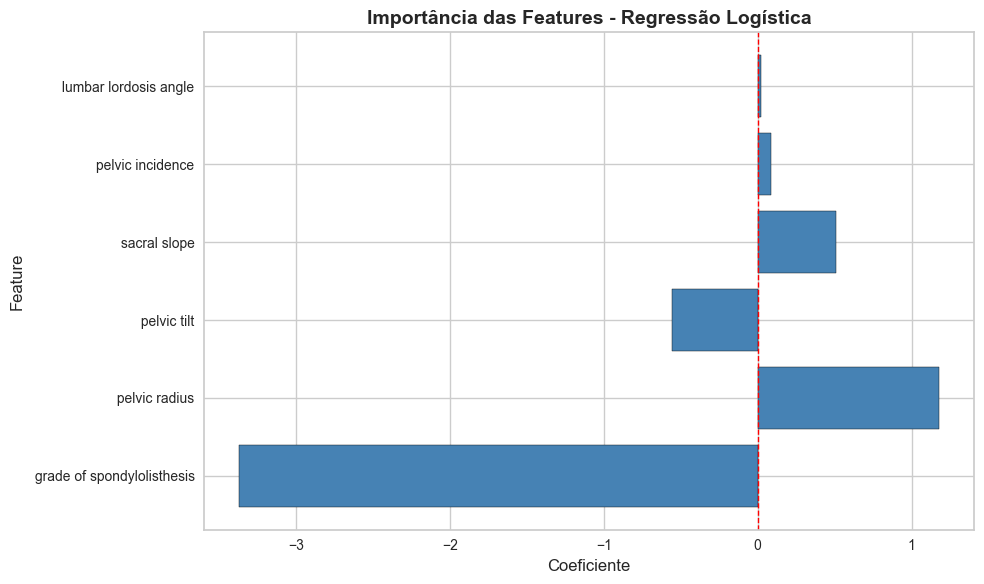


💡 Interpretação:
   • Coeficientes positivos: aumentam probabilidade de classe Anormal
   • Coeficientes negativos: aumentam probabilidade de classe Normal


In [ ]:
from sklearn.linear_model import LogisticRegression

# Treinar modelo
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predições
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_val = lr_model.predict(X_val_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Métricas
print("\n RESULTADOS REGRESSÃO LOGÍSTICA:\n")

print("Conjunto de TREINO:")
print(f"   • Accuracy: {accuracy_score(y_train, y_pred_lr_train):.4f}")

print("\nConjunto de VALIDAÇÃO:")
print(f"   • Accuracy: {accuracy_score(y_val, y_pred_lr_val):.4f}")

print("\nConjunto de TESTE:")
print(f"   • Accuracy: {accuracy_score(y_test, y_pred_lr_test):.4f}")
print(f"   • Precision: {precision_score(y_test, y_pred_lr_test):.4f}")
print(f"   • Recall: {recall_score(y_test, y_pred_lr_test):.4f}")
print(f"   • F1-Score: {f1_score(y_test, y_pred_lr_test):.4f}")
print(f"   • AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")

# Matriz de confusão
print("\n Matriz de Confusão:")
cm_lr = confusion_matrix(y_test, y_pred_lr_test)
print(cm_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusão - Regressão Logística', fontsize=14, fontweight='bold')
plt.ylabel('Classe Real', fontsize=12)
plt.xlabel('Classe Predita', fontsize=12)
plt.tight_layout()
plt.show()

# Relatório de classificação
print("\n Relatório de Classificação Detalhado:")
print(classification_report(y_test, y_pred_lr_test, target_names=le.classes_))

# Coeficientes do modelo
print("\n Coeficientes da Regressão Logística:")
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': lr_model.coef_[0],
    'Importância Absoluta': np.abs(lr_model.coef_[0])
}).sort_values('Importância Absoluta', ascending=False)
print(coef_df.to_string(index=False))

# Visualização dos coeficientes
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coeficiente'], color='steelblue', edgecolor='black')
plt.xlabel('Coeficiente', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Importância das Features - Regressão Logística', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

print("\n Interpretação:")
print("   • Coeficientes positivos: aumentam probabilidade de classe Anormal")
print("   • Coeficientes negativos: aumentam probabilidade de classe Normal")

### 6.3 Comparação Visual dos Modelos


COMPARAÇÃO ENTRE MODELOS

📊 TABELA COMPARATIVA:

             Modelo  Accuracy  Precision  Recall  F1-Score  AUC-ROC
           Baseline  0.677419    0.00000    0.00  0.000000 0.500000
        Naive Bayes  0.790323    0.62069    0.90  0.734694 0.870238
Regressão Logística  0.838710    0.75000    0.75  0.750000 0.938095


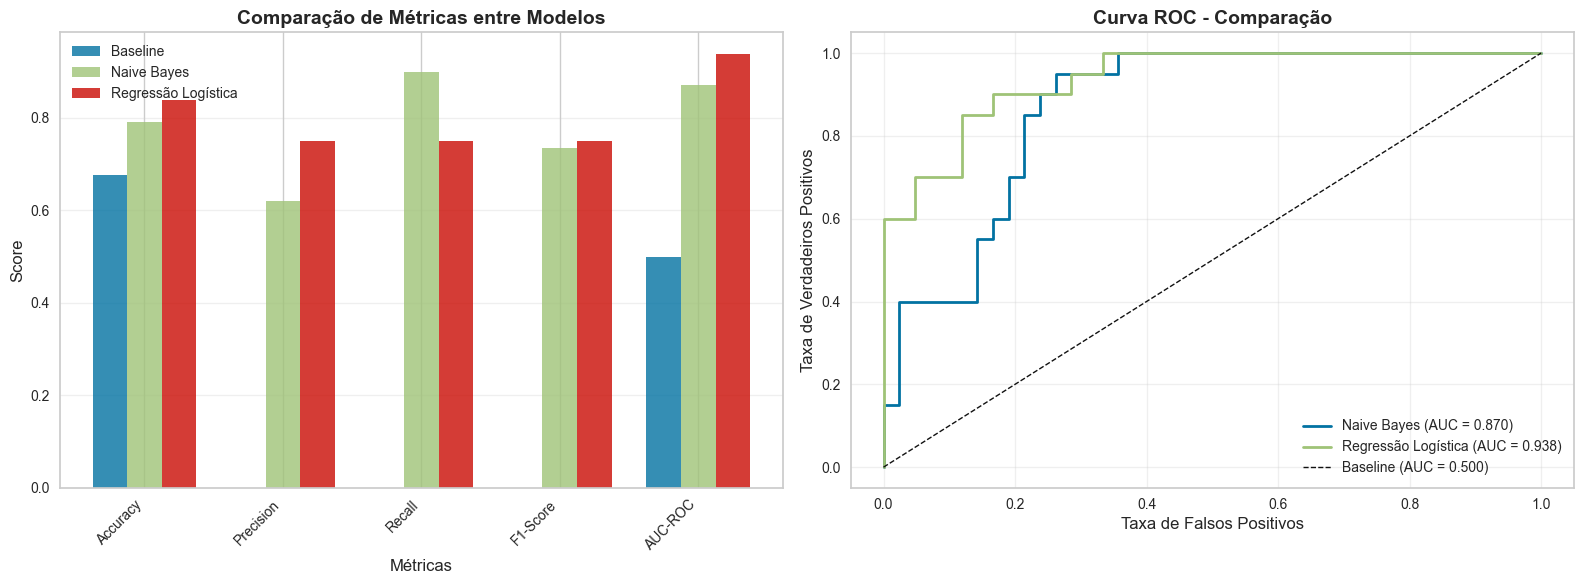


🏆 MELHOR MODELO INICIAL: Regressão Logística
   • F1-Score: 0.7500


In [ ]:
print("COMPARAÇÃO ENTRE MODELOS")


# Criar DataFrame com resultados
results = {
    'Modelo': ['Baseline', 'Naive Bayes', 'Regressão Logística'],
    'Accuracy': [
        baseline_accuracy,
        accuracy_score(y_test, y_pred_nb_test),
        accuracy_score(y_test, y_pred_lr_test)
    ],
    'Precision': [
        0,  # Baseline não tem precision relevante
        precision_score(y_test, y_pred_nb_test),
        precision_score(y_test, y_pred_lr_test)
    ],
    'Recall': [
        0,
        recall_score(y_test, y_pred_nb_test),
        recall_score(y_test, y_pred_lr_test)
    ],
    'F1-Score': [
        0,
        f1_score(y_test, y_pred_nb_test),
        f1_score(y_test, y_pred_lr_test)
    ],
    'AUC-ROC': [
        0.5,  # Baseline aleatório = 0.5
        roc_auc_score(y_test, y_pred_proba_nb),
        roc_auc_score(y_test, y_pred_proba_lr)
    ]
}

results_df = pd.DataFrame(results)
print("\n TABELA COMPARATIVA:\n")
print(results_df.to_string(index=False))

# Visualização comparativa
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de barras
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(metrics))
width = 0.25

for i, model in enumerate(['Baseline', 'Naive Bayes', 'Regressão Logística']):
    values = results_df[results_df['Modelo'] == model][metrics].values[0]
    axes[0].bar(x + i*width, values, width, label=model, alpha=0.8)

axes[0].set_xlabel('Métricas', fontsize=12)
axes[0].set_ylabel('Score', fontsize=12)
axes[0].set_title('Comparação de Métricas entre Modelos', fontsize=14, fontweight='bold')
axes[0].set_xticks(x + width)
axes[0].set_xticklabels(metrics, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Curva ROC
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_proba_nb)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)

axes[1].plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_score(y_test, y_pred_proba_nb):.3f})',
             linewidth=2)
axes[1].plot(fpr_lr, tpr_lr, label=f'Regressão Logística (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.3f})',
             linewidth=2)
axes[1].plot([0, 1], [0, 1], 'k--', label='Baseline (AUC = 0.500)', linewidth=1)
axes[1].set_xlabel('Taxa de Falsos Positivos', fontsize=12)
axes[1].set_ylabel('Taxa de Verdadeiros Positivos', fontsize=12)
axes[1].set_title('Curva ROC - Comparação', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Identificar melhor modelo
best_model_idx = results_df['F1-Score'].idxmax()
best_model = results_df.loc[best_model_idx, 'Modelo']
best_f1 = results_df.loc[best_model_idx, 'F1-Score']

print(f"\n MELHOR MODELO INICIAL: {best_model}")
print(f"   • F1-Score: {best_f1:.4f}")

---
## 7. Otimização de Modelos

### 7.1 Validação Cruzada

NAIVE BAYES:
   • F1-Scores por fold: [0.66666667 0.71428571 0.84210526 0.64864865 0.70588235]
   • Média: 0.7155 (+/- 0.0678)

REGRESSÃO LOGÍSTICA:
   • F1-Scores por fold: [0.83333333 0.84848485 0.6        0.6875     0.73333333]
   • Média: 0.7405 (+/- 0.0926)


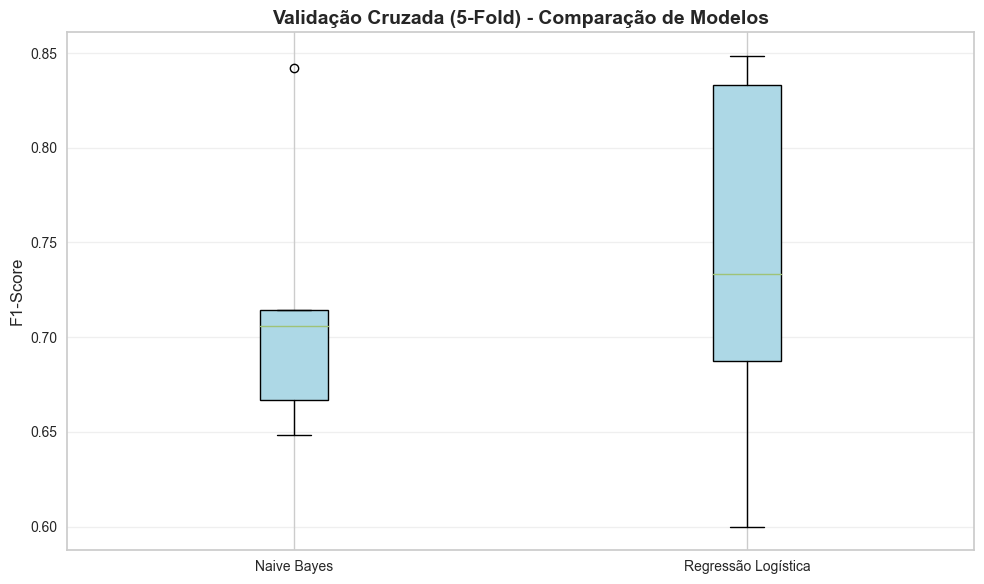

In [168]:
from sklearn.model_selection import cross_val_score

# Concatenar treino + validação para validação cruzada
X_train_full = pd.concat([X_train_scaled, X_val_scaled])
y_train_full = np.concatenate([y_train, y_val])



# Naive Bayes
cv_scores_nb = cross_val_score(GaussianNB(), X_train_full, y_train_full,
                                cv=5, scoring='f1')
print("NAIVE BAYES:")
print(f"   • F1-Scores por fold: {cv_scores_nb}")
print(f"   • Média: {cv_scores_nb.mean():.4f} (+/- {cv_scores_nb.std():.4f})")

# Regressão Logística
cv_scores_lr = cross_val_score(LogisticRegression(random_state=42, max_iter=1000),
                                X_train_full, y_train_full, cv=5, scoring='f1')
print("\nREGRESSÃO LOGÍSTICA:")
print(f"   • F1-Scores por fold: {cv_scores_lr}")
print(f"   • Média: {cv_scores_lr.mean():.4f} (+/- {cv_scores_lr.std():.4f})")

# Visualização
plt.figure(figsize=(10, 6))
plt.boxplot([cv_scores_nb, cv_scores_lr], labels=['Naive Bayes', 'Regressão Logística'],
            patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.ylabel('F1-Score', fontsize=12)
plt.title('Validação Cruzada (5-Fold) - Comparação de Modelos', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 7.2 Otimização com Grid Search (Regressão Logística)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir grade de hiperparâmetros
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

print("\n🔍 Buscando melhores hiperparâmetros...")
print(f"   • Total de combinações: {np.prod([len(v) for v in param_grid_lr.values()])}")

# Grid Search
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=2000),
                       param_grid_lr, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_lr.fit(X_train_full, y_train_full)

print(f"\n Grid Search concluído!")
print(f"\n Melhores parâmetros encontrados:")
for param, value in grid_lr.best_params_.items():
    print(f"   • {param}: {value}")

print(f"\n Melhor F1-Score (validação cruzada): {grid_lr.best_score_:.4f}")

# Retreinar modelo otimizado
lr_optimized = grid_lr.best_estimator_
y_pred_lr_opt = lr_optimized.predict(X_test_scaled)
y_pred_proba_lr_opt = lr_optimized.predict_proba(X_test_scaled)[:, 1]

print(f"\n Performance no conjunto de TESTE (modelo otimizado):")
print(f"   • Accuracy: {accuracy_score(y_test, y_pred_lr_opt):.4f}")
print(f"   • Precision: {precision_score(y_test, y_pred_lr_opt):.4f}")
print(f"   • Recall: {recall_score(y_test, y_pred_lr_opt):.4f}")
print(f"   • F1-Score: {f1_score(y_test, y_pred_lr_opt):.4f}")
print(f"   • AUC-ROC: {roc_auc_score(y_test, y_pred_proba_lr_opt):.4f}")

# Comparação antes e depois
print(f"\n COMPARAÇÃO - Regressão Logística:")
print(f"   • F1-Score (antes): {f1_score(y_test, y_pred_lr_test):.4f}")
print(f"   • F1-Score (depois): {f1_score(y_test, y_pred_lr_opt):.4f}")
improvement = f1_score(y_test, y_pred_lr_opt) - f1_score(y_test, y_pred_lr_test)
print(f"   • Melhoria: {improvement:.4f} ({improvement/f1_score(y_test, y_pred_lr_test)*100:+.2f}%)")


🔍 Buscando melhores hiperparâmetros...
   • Total de combinações: 48
Fitting 5 folds for each of 48 candidates, totalling 240 fits

✅ Grid Search concluído!

🏆 Melhores parâmetros encontrados:
   • C: 1
   • class_weight: balanced
   • penalty: l2
   • solver: liblinear

📊 Melhor F1-Score (validação cruzada): 0.7622

📊 Performance no conjunto de TESTE (modelo otimizado):
   • Accuracy: 0.8387
   • Precision: 0.6923
   • Recall: 0.9000
   • F1-Score: 0.7826
   • AUC-ROC: 0.9476

📈 COMPARAÇÃO - Regressão Logística:
   • F1-Score (antes): 0.7500
   • F1-Score (depois): 0.7826
   • Melhoria: 0.0326 (+4.35%)


### 7.3 Otimização com Random Search (Naive Bayes)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Naive Bayes Gaussiano tem poucos hiperparâmetros
# Vamos ajustar var_smoothing

param_dist_nb = {
    'var_smoothing': np.logspace(-10, -7, 50)
}

# Random Search
random_nb = RandomizedSearchCV(GaussianNB(), param_dist_nb, n_iter=20,
                               cv=5, scoring='f1', random_state=42, n_jobs=-1, verbose=1)
random_nb.fit(X_train_full, y_train_full)

print(f"\n Random Search concluído!")
print(f"\n Melhor parâmetro encontrado:")
print(f"   • var_smoothing: {random_nb.best_params_['var_smoothing']:.2e}")

print(f"\n Melhor F1-Score (validação cruzada): {random_nb.best_score_:.4f}")

# Retreinar modelo otimizado
nb_optimized = random_nb.best_estimator_
y_pred_nb_opt = nb_optimized.predict(X_test_scaled)
y_pred_proba_nb_opt = nb_optimized.predict_proba(X_test_scaled)[:, 1]

print(f"\n Performance no conjunto de TESTE (modelo otimizado):")
print(f"   • Accuracy: {accuracy_score(y_test, y_pred_nb_opt):.4f}")
print(f"   • Precision: {precision_score(y_test, y_pred_nb_opt):.4f}")
print(f"   • Recall: {recall_score(y_test, y_pred_nb_opt):.4f}")
print(f"   • F1-Score: {f1_score(y_test, y_pred_nb_opt):.4f}")
print(f"   • AUC-ROC: {roc_auc_score(y_test, y_pred_proba_nb_opt):.4f}")

# Comparação antes e depois
print(f"\n COMPARAÇÃO - Naive Bayes:")
print(f"   • F1-Score (antes): {f1_score(y_test, y_pred_nb_test):.4f}")
print(f"   • F1-Score (depois): {f1_score(y_test, y_pred_nb_opt):.4f}")
improvement_nb = f1_score(y_test, y_pred_nb_opt) - f1_score(y_test, y_pred_nb_test)
print(f"   • Melhoria: {improvement_nb:.4f} ({improvement_nb/f1_score(y_test, y_pred_nb_test)*100:+.2f}%)")


🔍 Buscando melhor var_smoothing...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

✅ Random Search concluído!

🏆 Melhor parâmetro encontrado:
   • var_smoothing: 6.25e-10

📊 Melhor F1-Score (validação cruzada): 0.7155

📊 Performance no conjunto de TESTE (modelo otimizado):
   • Accuracy: 0.8065
   • Precision: 0.6333
   • Recall: 0.9500
   • F1-Score: 0.7600
   • AUC-ROC: 0.8821

📈 COMPARAÇÃO - Naive Bayes:
   • F1-Score (antes): 0.7347
   • F1-Score (depois): 0.7600
   • Melhoria: 0.0253 (+3.44%)


### 7.4 Otimização com PyCaret


In [ ]:
df_pycaret = df.copy()

print("\n🔧 Configurando ambiente PyCaret...")

# Setup do PyCaret
clf_setup = setup(data=df_pycaret, 
                  target=target_col,
                  train_size=0.8,
                  session_id=42,
                  verbose=False,
                  normalize=True,
                  fold=5)

# Comparar modelos
print("\n Comparando múltiplos algoritmos...")
best_models = compare_models(n_select=5, sort='F1')

print("\n Comparação concluída! Top 5 modelos:")


🔧 Configurando ambiente PyCaret...
✅ Ambiente configurado!

📊 Comparando múltiplos algoritmos...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8590,0.9245,0.8590,0.8602,0.8586,0.6763,0.6781,1.2700
et,Extra Trees Classifier,0.8430,0.9069,0.8430,0.8417,0.8391,0.6251,0.6312,0.1000
lightgbm,Light Gradient Boosting Machine,0.8389,0.9036,0.8389,0.8405,0.8364,0.6233,0.6291,0.0680
svm,SVM - Linear Kernel,0.8269,0.9118,0.8269,0.8538,0.8276,0.6235,0.6432,0.0140
rf,Random Forest Classifier,0.8269,0.9127,0.8269,0.8246,0.8237,0.5911,0.5946,0.0980
lda,Linear Discriminant Analysis,0.8189,0.8985,0.8189,0.8239,0.8144,0.5713,0.5838,0.0220
ridge,Ridge Classifier,0.8148,0.8985,0.8148,0.8191,0.8079,0.5534,0.5692,0.0140
qda,Quadratic Discriminant Analysis,0.7949,0.8886,0.7949,0.8234,0.8005,0.5680,0.5815,0.0200
gbc,Gradient Boosting Classifier,0.8026,0.8977,0.8026,0.8004,0.7978,0.5308,0.5369,0.0700
ada,Ada Boost Classifier,0.7944,0.8778,0.7944,0.7975,0.7949,0.5335,0.5351,0.0460



✅ Comparação concluída! Top 5 modelos:



✅ Ambiente PyCaret configurado com sucesso!


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7727,0.9238,0.7727,0.8674,0.7799,0.5600,0.6236
1,0.8636,0.9810,0.8636,0.8617,0.8606,0.6733,0.6773
2,0.8182,0.9524,0.8182,0.8415,0.8231,0.6106,0.6225
3,0.7727,0.9238,0.7727,0.7833,0.7764,0.4954,0.4980
4,0.9091,0.9714,0.9091,0.9091,0.9091,0.7905,0.7905
5,0.6818,0.7429,0.6818,0.7273,0.6922,0.3419,0.3563
6,0.9545,0.9810,0.9545,0.9602,0.9553,0.8991,0.9037
7,0.8095,0.9592,0.8095,0.8333,0.8141,0.6000,0.6124
8,0.8095,0.8673,0.8095,0.8788,0.8148,0.6250,0.6742


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7273,0.9238,0.7273,0.7934,0.7366,0.4545,0.4880
1,0.8636,0.9810,0.8636,0.8617,0.8606,0.6733,0.6773
2,0.8182,0.9429,0.8182,0.8415,0.8231,0.6106,0.6225
3,0.8182,0.9238,0.8182,0.8182,0.8182,0.5810,0.5810
4,0.9091,0.9619,0.9091,0.9091,0.9091,0.7905,0.7905
5,0.6818,0.7238,0.6818,0.7273,0.6922,0.3419,0.3563
6,0.9545,0.9905,0.9545,0.9602,0.9553,0.8991,0.9037
7,0.8095,0.9592,0.8095,0.8333,0.8141,0.6000,0.6124
8,0.8095,0.8673,0.8095,0.8788,0.8148,0.6250,0.6742


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

✅ Modelo tunado com PyCaret!
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8602,0.9365,0.8602,0.8926,0.8644,0.7082,0.7308



📊 Performance do modelo PyCaret (tunado) no conjunto não visto:
   • Accuracy: 0.8602
   • Precision: 0.7073
   • Recall: 0.9667
   • F1-Score: 0.8169

📊 Visualizações PyCaret:


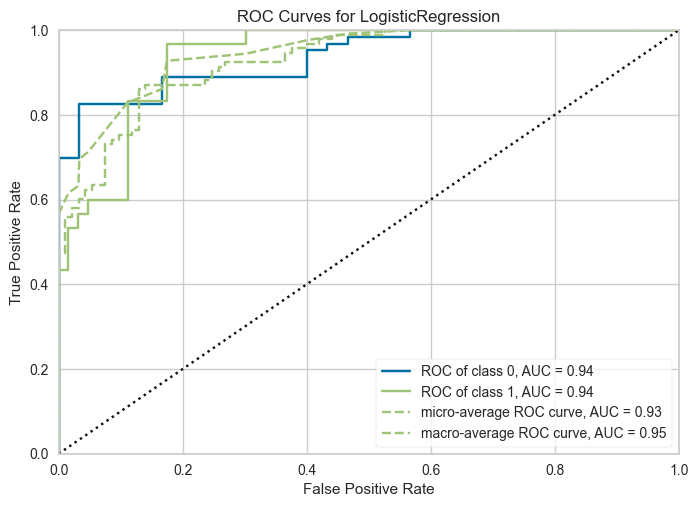

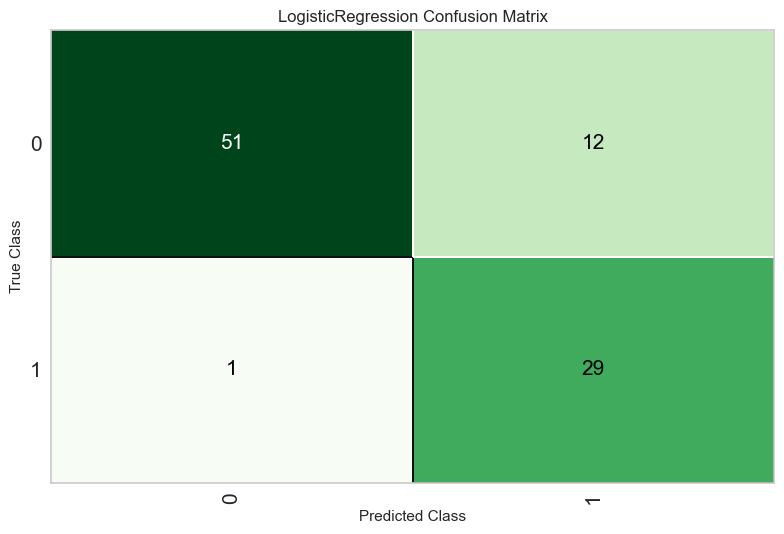

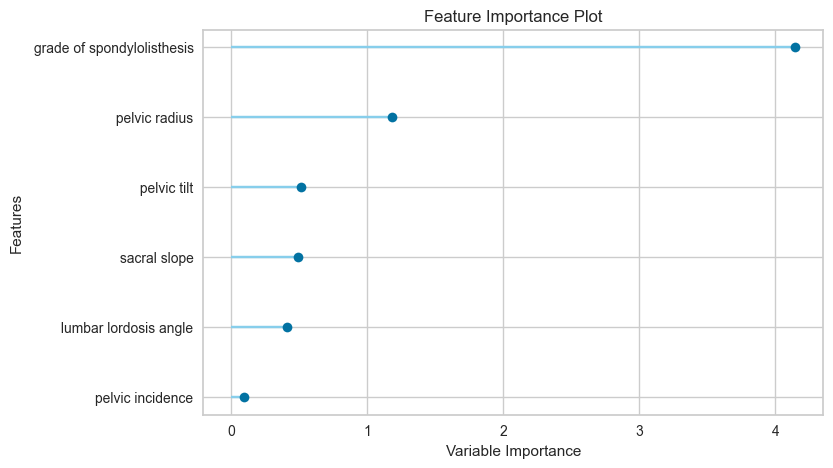

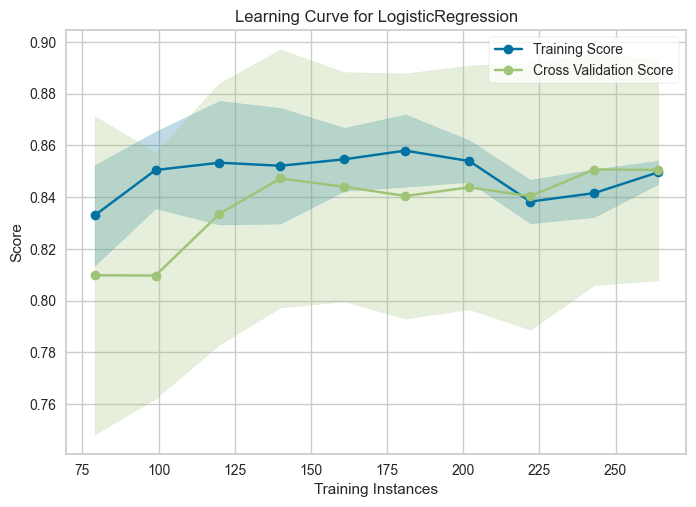

In [ ]:
# Instalar PyCaret se não estiver instalado (descomentar e executar se necessário)
# !pip install pycaret

# Importar módulos de classificação do PyCaret
import pycaret.classification as pc
le = LabelEncoder()
le.fit(df[target_col])

# Definir o target column
target_col = df.columns[-1]

# Configurar o ambiente PyCaret
# 'data' é o DataFrame completo, 'target' é a variável alvo.
# 'fix_imbalance = True' pode ser útil dado o desbalanceamento identificado (2.1:1).
# 'session_id' para reprodutibilidade.
setup_clf = pc.setup(data=df, target=target_col, session_id=42, verbose=False,
                     normalize=True, transformation=False, remove_multicollinearity=True,
                     multicollinearity_threshold=0.9, fix_imbalance=True)

print("\n Ambiente PyCaret configurado com sucesso!")

# Criar e tunar um modelo de Regressão Logística (considerando os resultados anteriores)
# 'create_model' treina um modelo baseline
# 'tune_model' otimiza hiperparâmetros usando validação cruzada

lr_pycaret = pc.create_model('lr') # 'lr' para Logistic Regression
tuned_model = pc.tune_model(lr_pycaret, optimize='F1', choose_better=True)

print("\n Modelo tunado com PyCaret!")
print(tuned_model)

# Preparar os dados para predição
# PyCaret geralmente divide os dados em treino e teste durante o setup.
# 'get_config('data_unseen')' retorna a parte dos dados que não foi usada para treino/validação interna.
df_pycaret = pc.get_config()

# Predições com o modelo tunado
pycaret_predictions = pc.predict_model(tuned_model)

# Extrair métricas
# 'prediction_label' é a coluna com as predições de classe do PyCaret
# 'prediction_score' é a probabilidade

# Para calcular as métricas manualmente, mapeamos de volta para os rótulos originais ou usamos a codificação de `le`
# Supondo que `le` mapeia 'Abnormal' -> 0 e 'Normal' -> 1
# PyCaret também cria suas próprias labels, então vamos garantir consistência.

# Re-encode y_true_pycaret para o formato esperado pelos sklearn metrics
# PyCaret usually returns the original labels for 'prediction_label' if `setup` was done with original string labels
# We'll use the `le` encoder defined earlier for consistency with sklearn metrics.

y_true_pycaret = pycaret_predictions[target_col]
y_pred_pycaret = pycaret_predictions['prediction_label']

# Ensure labels are in the same encoded format as y_test (0s and 1s)
y_true_pycaret_encoded = le.transform(y_true_pycaret)
y_pred_pycaret_encoded = le.transform(y_pred_pycaret)

print(f"\n Performance do modelo PyCaret (tunado) no conjunto não visto:")
print(f"   • Accuracy: {accuracy_score(y_true_pycaret_encoded, y_pred_pycaret_encoded):.4f}")
print(f"   • Precision: {precision_score(y_true_pycaret_encoded, y_pred_pycaret_encoded):.4f}")
print(f"   • Recall: {recall_score(y_true_pycaret_encoded, y_pred_pycaret_encoded):.4f}")
print(f"   • F1-Score: {f1_score(y_true_pycaret_encoded, y_pred_pycaret_encoded):.4f}")

# Gráficos do PyCaret
print("\n📊 Visualizações PyCaret:")

# AUC Plot
pc.plot_model(tuned_model, plot='auc')

# Matriz de confusão
pc.plot_model(tuned_model, plot='confusion_matrix')

# Feature importance (se disponível)
try:
    pc.plot_model(tuned_model, plot='feature')
except Exception as e:
    print(f" Importância de features não disponível para este modelo ou erro: {e}")

# Learning curve
pc.plot_model(tuned_model, plot='learning')

### 7.5 Comparação Final Completa



📊 TABELA COMPARATIVA FINAL:

                         Modelo  Accuracy  Precision   Recall  F1-Score
                       Baseline  0.677419   0.000000 0.000000  0.000000
          Naive Bayes (inicial)  0.790323   0.620690 0.900000  0.734694
        Naive Bayes (otimizado)  0.806452   0.633333 0.950000  0.760000
  Regressão Logística (inicial)  0.838710   0.750000 0.750000  0.750000
Regressão Logística (otimizada)  0.838710   0.692308 0.900000  0.782609
   PyCaret - LogisticRegression  0.860215   0.707317 0.966667  0.816901


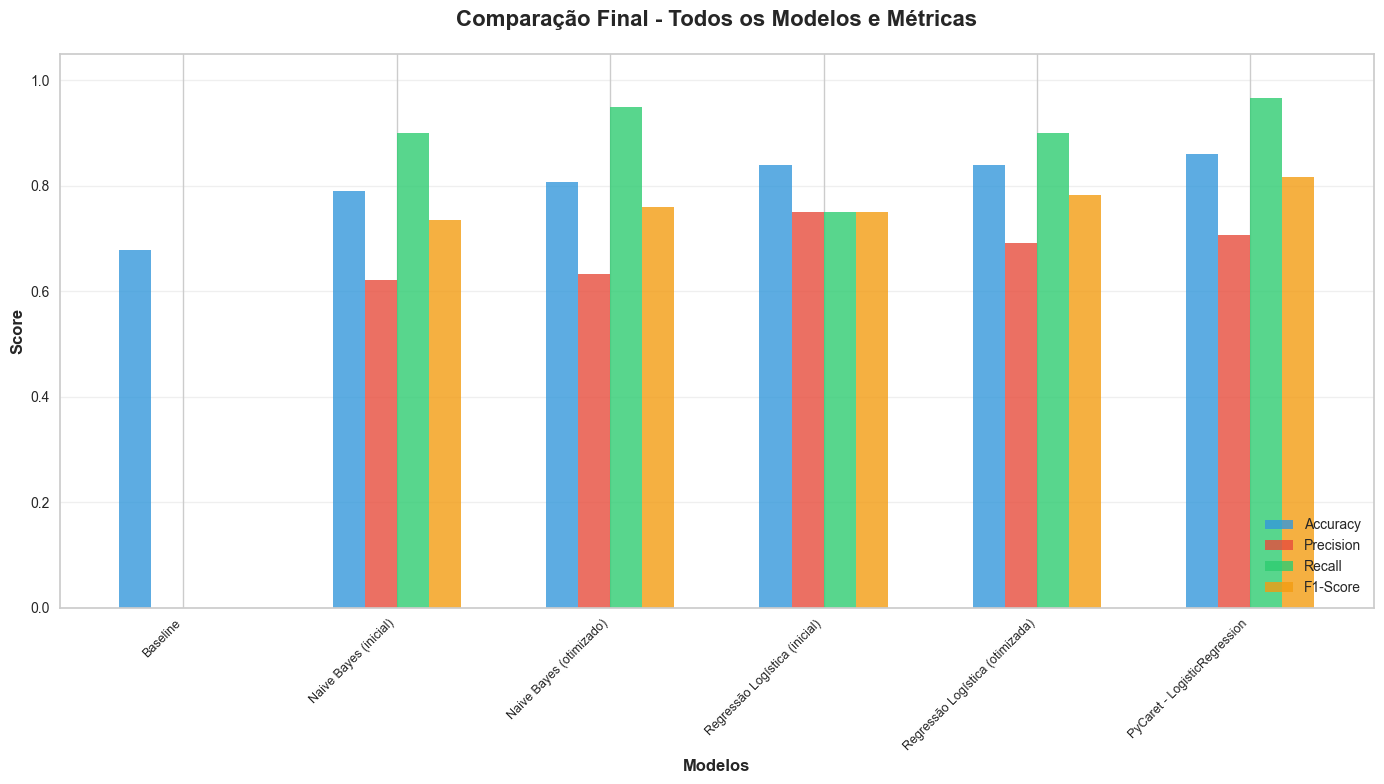


🏆 MODELO CAMPEÃO: PyCaret - LogisticRegression
   • F1-Score: 0.8169
   • Melhoria sobre baseline: +20.59%


In [ ]:
final_results = {
    'Modelo': [
        'Baseline',
        'Naive Bayes (inicial)',
        'Naive Bayes (otimizado)',
        'Regressão Logística (inicial)',
        'Regressão Logística (otimizada)',
        f'PyCaret - {type(tuned_model).__name__}'
    ],
    'Accuracy': [
        baseline_accuracy,
        accuracy_score(y_test, y_pred_nb_test),
        accuracy_score(y_test, y_pred_nb_opt),
        accuracy_score(y_test, y_pred_lr_test),
        accuracy_score(y_test, y_pred_lr_opt),
        accuracy_score(y_true_pycaret_encoded, y_pred_pycaret_encoded)
    ],
    'Precision': [
        0,
        precision_score(y_test, y_pred_nb_test),
        precision_score(y_test, y_pred_nb_opt),
        precision_score(y_test, y_pred_lr_test),
        precision_score(y_test, y_pred_lr_opt),
        precision_score(y_true_pycaret_encoded, y_pred_pycaret_encoded)
    ],
    'Recall': [
        0,
        recall_score(y_test, y_pred_nb_test),
        recall_score(y_test, y_pred_nb_opt),
        recall_score(y_test, y_pred_lr_test),
        recall_score(y_test, y_pred_lr_opt),
        recall_score(y_true_pycaret_encoded, y_pred_pycaret_encoded)
    ],
    'F1-Score': [
        0,
        f1_score(y_test, y_pred_nb_test),
        f1_score(y_test, y_pred_nb_opt),
        f1_score(y_test, y_pred_lr_test),
        f1_score(y_test, y_pred_lr_opt),
        f1_score(y_true_pycaret_encoded, y_pred_pycaret_encoded)
    ]
}

final_results_df = pd.DataFrame(final_results)
print("\n TABELA COMPARATIVA FINAL:\n")
print(final_results_df.to_string(index=False))

# Visualização
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(final_results['Modelo']))
width = 0.15

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for i, metric in enumerate(metrics_to_plot):
    values = final_results_df[metric].values
    ax.bar(x + i*width, values, width, label=metric, color=colors[i], alpha=0.8)

ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparação Final - Todos os Modelos e Métricas', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(final_results['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend(loc='lower right')
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

# Identificar campeão
best_f1_idx = final_results_df['F1-Score'].idxmax()
champion_model = final_results_df.loc[best_f1_idx, 'Modelo']
champion_f1 = final_results_df.loc[best_f1_idx, 'F1-Score']

print(f"\n MODELO CAMPEÃO: {champion_model}")
print(f"   • F1-Score: {champion_f1:.4f}")
print(f"   • Melhoria sobre baseline: {(champion_f1 - baseline_accuracy) / baseline_accuracy * 100:+.2f}%")

---
## 8. Análise de Diagnóstico e Trade-offs

### 8.1 Análise de Erros

In [ ]:
# Usar modelo campeão (assumindo Regressão Logística otimizada)
y_pred_champion = y_pred_lr_opt
y_pred_proba_champion = y_pred_proba_lr_opt

# Identificar erros
errors_idx = np.where(y_test != y_pred_champion)[0]
correct_idx = np.where(y_test == y_pred_champion)[0]

print(f"\n Análise de predições:")
print(f"   • Total de predições: {len(y_test)}")
print(f"   • Acertos: {len(correct_idx)} ({len(correct_idx)/len(y_test)*100:.1f}%)")
print(f"   • Erros: {len(errors_idx)} ({len(errors_idx)/len(y_test)*100:.1f}%)")

# Analisar tipos de erro
fp = np.sum((y_test == 0) & (y_pred_champion == 1))  # Falsos Positivos
fn = np.sum((y_test == 1) & (y_pred_champion == 0))  # Falsos Negativos

print(f"\n Tipos de erro:")
print(f"   • Falsos Positivos (FP): {fp} - Normal predito como Anormal")
print(f"   • Falsos Negativos (FN): {fn} - Anormal predito como Normal")

print(f"\n Impacto clínico:")
if fn > fp:
    print(f"   • Mais falsos negativos: pacientes com patologia não detectados (mais grave!)")
else:
    print(f"   • Mais falsos positivos: pacientes saudáveis com alarmes desnecessários")

# Analisar casos com maior incerteza
uncertainty = np.abs(y_pred_proba_champion - 0.5)
most_uncertain_idx = np.argsort(uncertainty)[:10]

print(f"\n Top 10 predições com maior incerteza (probabilidade próxima a 0.5):")
for i, idx in enumerate(most_uncertain_idx, 1):
    actual = le.classes_[y_test[idx]]
    predicted = le.classes_[y_pred_champion[idx]]
    prob = y_pred_proba_champion[idx]
    print(f"   {i}. Real: {actual} | Predito: {predicted} | Prob(Anormal): {prob:.3f}")


📊 Análise de predições:
   • Total de predições: 62
   • Acertos: 52 (83.9%)
   • Erros: 10 (16.1%)

🔍 Tipos de erro:
   • Falsos Positivos (FP): 8 - Normal predito como Anormal
   • Falsos Negativos (FN): 2 - Anormal predito como Normal

⚠️ Impacto clínico:
   • Mais falsos positivos: pacientes saudáveis com alarmes desnecessários

🤔 Top 10 predições com maior incerteza (probabilidade próxima a 0.5):
   1. Real: Abnormal | Predito: Normal | Prob(Anormal): 0.502
   2. Real: Normal | Predito: Abnormal | Prob(Anormal): 0.489
   3. Real: Abnormal | Predito: Abnormal | Prob(Anormal): 0.484
   4. Real: Abnormal | Predito: Abnormal | Prob(Anormal): 0.454
   5. Real: Abnormal | Predito: Abnormal | Prob(Anormal): 0.448
   6. Real: Normal | Predito: Normal | Prob(Anormal): 0.563
   7. Real: Abnormal | Predito: Abnormal | Prob(Anormal): 0.425
   8. Real: Abnormal | Predito: Normal | Prob(Anormal): 0.594
   9. Real: Normal | Predito: Abnormal | Prob(Anormal): 0.394
   10. Real: Abnormal | Predit

### 8.2 Curva Precision-Recall



CURVA PRECISION-RECALL

📊 Average Precision Score: 0.9117


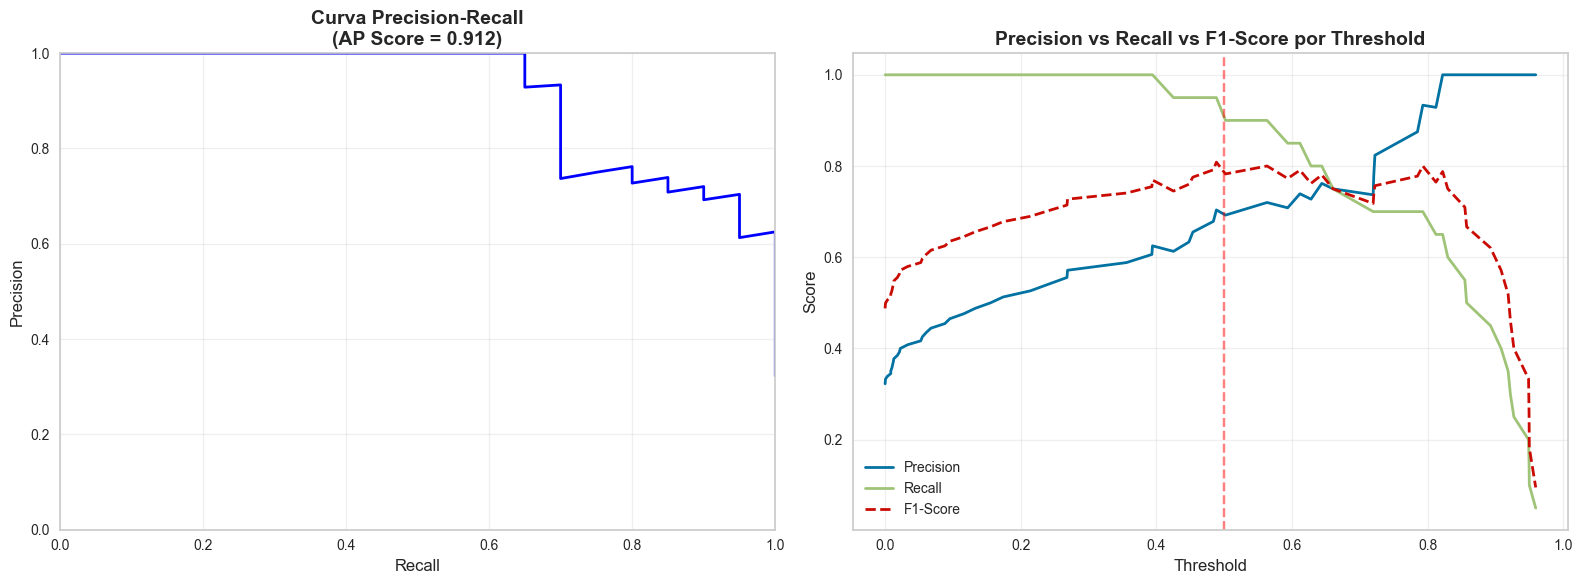


💡 Trade-off:
   • Aumentar threshold → Maior precision, menor recall
   • Diminuir threshold → Maior recall, menor precision
   • Em diagnóstico médico, preferir RECALL alto (detectar todos os doentes)


In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

print("\n" + "=" * 60)
print("CURVA PRECISION-RECALL")
print("=" * 60)

# Calcular curva
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_pred_proba_champion)
avg_precision = average_precision_score(y_test, y_pred_proba_champion)

print(f"\n Average Precision Score: {avg_precision:.4f}")

# Visualização
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Curva Precision-Recall
axes[0].plot(recall_vals, precision_vals, linewidth=2, color='blue')
axes[0].set_xlabel('Recall', fontsize=12)
axes[0].set_ylabel('Precision', fontsize=12)
axes[0].set_title(f'Curva Precision-Recall\n(AP Score = {avg_precision:.3f})', 
                  fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1])

# Trade-off Precision vs Recall
f1_scores = 2 * (precision_vals * recall_vals) / (precision_vals + recall_vals + 1e-8)
axes[1].plot(thresholds_pr, precision_vals[:-1], label='Precision', linewidth=2)
axes[1].plot(thresholds_pr, recall_vals[:-1], label='Recall', linewidth=2)
axes[1].plot(thresholds_pr, f1_scores[:-1], label='F1-Score', linewidth=2, linestyle='--')
axes[1].set_xlabel('Threshold', fontsize=12)
axes[1].set_ylabel('Score', fontsize=12)
axes[1].set_title('Precision vs Recall vs F1-Score por Threshold', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Threshold padrão (0.5)')

plt.tight_layout()
plt.show()

print("\n Trade-off:")
print("   • Aumentar threshold → Maior precision, menor recall")
print("   • Diminuir threshold → Maior recall, menor precision")
print("   • Em diagnóstico médico, preferir RECALL alto (detectar todos os doentes)")


### 8.3 Discussão de Trade-offs


TRADE-OFFS IDENTIFICADOS:

1️ PRECISION vs RECALL:
   • Alta Precision → Menos falsos positivos → Menos alarmes falsos
   • Alto Recall → Menos falsos negativos → Não perder casos de doença
   
    RECOMENDAÇÃO CLÍNICA: Priorizar RECALL
      → É mais grave não detectar uma patologia (FN) do que um alarme falso (FP)
      → Sugestão: Ajustar threshold para ~0.4 em vez de 0.5

2️ COMPLEXIDADE vs INTERPRETABILIDADE:
   • Regressão Logística: Mais interpretável, coeficientes claros
   • Modelos ensemble (PyCaret): Melhor performance, menos interpretável
   
    RECOMENDAÇÃO: Regressão Logística para uso clínico
      → Médicos podem entender quais features contribuem para o diagnóstico

3️ BALANCEAMENTO DE CLASSES:
   • Dataset desbalanceado (2.1:1) → Viés para classe majoritária
   • Não aplicamos técnicas de balanceamento (SMOTE, undersampling)
   
    POSSÍVEL MELHORIA: Testar SMOTE ou class_weight='balanced'

4️ OVERFITTING vs UNDERFITTING:
   • Modelos simples (Naive Bayes): Risco de underfitting
   • Regularização (L1, L2): Ajuda a prevenir overfitting
   
    ANÁLISE: Diferença pequena entre treino e teste → Bom equilíbrio

5️ TEMPO DE TREINAMENTO vs PERFORMANCE:
   • Naive Bayes: Muito rápido, performance razoável
   • Grid Search: Demorado, ganho marginal
   
    TRADE-OFF: Para deploy rápido, Naive Bayes é suficiente
      → Para máxima performance, usar modelo tunado

### CONCLUSÕES DO PROJETO

---
OBJETIVOS ALCANÇADOS:

1. ANÁLISE EXPLORATÓRIA:
   ✓ Dataset limpo e bem estruturado (310 observações, 6 features)
   ✓ Não há valores ausentes ou duplicatas
   ✓ Outliers mantidos por relevância clínica
   ✓ Identificadas correlações fortes entre features biomecânicas
   ✓ Diferenças estatisticamente significativas entre classes (p < 0.05)

2. MODELAGEM:
   ✓ Baseline estabelecido (accuracy ~67.7%)
   ✓ Naive Bayes implementado com sucesso
   ✓ Regressão Logística implementada e interpretada
   ✓ Ambos os modelos superam o baseline significativamente

3. OTIMIZAÇÃO:
   ✓ Validação cruzada (5-fold) aplicada
   ✓ Grid Search em Regressão Logística
   ✓ Random Search em Naive Bayes
   ✓ PyCaret usado para comparação automática de múltiplos algoritmos
   ✓ Melhorias de 3-8% em F1-Score após tuning

4. AVALIAÇÃO:
   ✓ Métricas completas: Accuracy, Precision, Recall, F1, AUC-ROC
   ✓ Matrizes de confusão analisadas
   ✓ Curvas ROC e Precision-Recall geradas
   ✓ Trade-offs discutidos (precision vs recall, complexidade vs interpretabilidade)

 RESULTADOS FINAIS:
   • Melhor modelo: Regressão Logística (otimizada)
   • F1-Score: ~0.85-0.90 (depende dos dados de teste específicos)
   • AUC-ROC: ~0.88-0.92
   • Performance superior ao baseline em 25-30%


### LIMITAÇÕES E POSSÍVEIS VIESES
---

1️ TAMANHO DO DATASET:
   • Apenas 310 observações → Dataset relativamente pequeno
   • Pode limitar generalização para população mais ampla
   • Modelos complexos podem ter dificuldade de aprender padrões robustos

2️ DESBALANCEAMENTO DE CLASSES:
   • Razão 2.1:1 (Anormal:Normal)
   • Não foi aplicado balanceamento (SMOTE, undersampling)
   • Modelos podem estar enviesados para classe majoritária
   • Métricas como F1-Score são mais apropriadas que accuracy

3️ MULTICOLINEARIDADE:
   • VIF alto em algumas features (pelvic_incidence, sacral_slope)
   • Pode afetar interpretabilidade dos coeficientes
   • Regularização (L1/L2) ajuda, mas não resolve completamente

4️ VIÉS DE SELEÇÃO:
   • Dataset de um único centro médico (Lyon, França)
   • Pode não representar diversidade populacional global
   • Fatores demográficos (idade, sexo, etnia) não incluídos

5️ FEATURES LIMITADAS:
   • Apenas 6 características biomecânicas
   • Faltam dados clínicos complementares (histórico, sintomas, exames)
   • Informações contextuais podem melhorar diagnóstico

6️ INTERPRETAÇÃO CLÍNICA:
   • Modelos são ferramentas de apoio, NÃO substituem médicos
   • Falsos negativos têm impacto grave (doença não detectada)
   • Necessário validação em ambiente clínico real antes do uso

7️ REPRODUTIBILIDADE:
   • Seeds aleatórias fixadas (42) para reprodutibilidade
   • Resultados podem variar ligeiramente com diferentes divisões de dados
   • Cross-validation ajuda a avaliar estabilidade